
# Aprendizaje no supervisado

## Introducción

Es un metodo de analisis de datos que nos permite que utiliza algoritmos que aprenden de forma iterativa con el proposito de encontrar 'informacion oculta' sin que nosotros programemos donde buscar.

Existen dos categorias en las que podemos clasificar estos algoritmos: clasificacion y regresión.

## Clasificación

![clasificacion](https://drive.google.com/uc?id=1l6fCAVAwgQJhp16b4iXgwXcGX4vqcbeV)
*Ejemplo de clasificación de frutas*

## Regresión



## Introdicción a los ejercicios de aprendizaje supervizado

Instalaremos los paquetes que se usarán en los ejercicios, comenzando con el entorno conda en colab:

In [1]:
!pip install -q condacolab

In [2]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:30
🔁 Restarting kernel...


Se instala ahora un paquete de traducción:

In [2]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=03dba79d4f98eeaf8289fa2bdc1e8e6d6d3d22a8cae124f3cb12fabb6a02335d
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
 

In [3]:
import sys
print(sys.executable)
!conda --version

/usr/bin/python3.real
conda 23.1.0


Instalaremos vía conda root-cern

In [4]:
!conda install -c conda-forge root

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with initial frozen solv

Se importan entonces las librerias a usar:

In [5]:
!python3 --version
import pandas as pd
import array,csv, os, time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from graphviz import Source
from IPython.display import SVG
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.utils import resample
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score , confusion_matrix
from sklearn.metrics import auc, roc_curve
from sklearn.inspection import DecisionBoundaryDisplay
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay
import seaborn as sns
from itertools import cycle
from sklearn import tree
import googletrans
from googletrans import Translator
from sklearn.tree import plot_tree
import ROOT
from ROOT import kBlack, kGray, kBlue, kRed,kGreen,kCyan,kViolet,kOrange,kCyan
#from ROOT import kSpring, kMagenta,kTeal, kNeon, kYellow, kGray, kCherry, kCoffee
#from ROOT import kLake,kOcean, kWaterMelon, kGreyScale, kAvocado, kDarkBodyRadiator
from ROOT import TLegend,TH1F,TH2F, TCanvas,TPaveStats,TGraph, TMultiGraph

Python 3.10.10
Welcome to JupyROOT 6.28/00


Importaremos los datos para los ejercicios desde el repositorio del taller:

In [6]:
!git clone https://github.com/ChJazhiel/HPC_II.git

Cloning into 'HPC_II'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 56.55 KiB | 3.77 MiB/s, done.
Resolving deltas: 100% (2/2), done.


Clasificación de enefermedades

In [7]:
df = pd.read_csv('/content/HPC_II/Taller_aprendizaje_supervisado/dataset.csv')
df.head()

Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [9]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [10]:
df['Disease'].isnull().values.any()

False

In [11]:
df['Symptom_5'].isnull().values.any()

True

Ahora vamos a

In [12]:
#cols = df.columns
data = df[df.columns].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

Disease  Symptom_1             Symptom_2             Symptom_3  \
0  Fungal infection    itching             skin_rash  nodal_skin_eruptions   
1  Fungal infection  skin_rash  nodal_skin_eruptions   dischromic _patches   
2  Fungal infection    itching  nodal_skin_eruptions   dischromic _patches   
3  Fungal infection    itching             skin_rash   dischromic _patches   
4  Fungal infection    itching             skin_rash  nodal_skin_eruptions   

             Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0  dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                  NaN       NaN       NaN       NaN       NaN       NaN   
2                  NaN       NaN       NaN       NaN       NaN       NaN   
3                  NaN       NaN       NaN       NaN       NaN       NaN   
4                  NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

LLenar con 0, no siempre es recomendable, recordar!!

In [13]:
df = df.fillna(0)
df.head()
print(df.columns)
print(df.shape)

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')
(4920, 18)


In [14]:
descripcion = pd.read_csv('/content/HPC_II/Taller_aprendizaje_supervisado/symptom_Description.csv')
descripcion.head()

Disease                                        Description
0   Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
1         Malaria  An infectious disease caused by protozoan para...
2         Allergy  An allergy is an immune system response to a f...
3  Hypothyroidism  Hypothyroidism, also called underactive thyroi...
4       Psoriasis  Psoriasis is a common skin disorder that forms...

Traducir las descripciones de los sintomas:

In [15]:
translator = Translator()
enfermedades = []
desc = []

#for index, row in df.iterrows():
#    value_in_column = row[column_label]
#translated = translator.translate('Good morning.', src='en', dest='de')

for i, element in descripcion.iterrows():
   #   print(element['Disease'])
   d = element['Disease']
   f = translator.translate(d , src = 'en' , dest = 'es' ).text
   q = element['Description']
   n = translator.translate(q , src = 'en' , dest = 'es' ).text
   enfermedades.append(f)
   desc.append(n)
   #print(f)

descripcion['Enfermedad'] = enfermedades
descripcion['Descripción'] = desc

descripcion.head()

#for column in descripcion.columns:
 #   u = descripcion[column].unique()
 #   for element in u:
 #     print(element)
 #       translations[element] = translator.translate(element).text
#for i in translations.items():
#    print(i)

Disease                                        Description  \
0   Drug Reaction  An adverse drug reaction (ADR) is an injury ca...   
1         Malaria  An infectious disease caused by protozoan para...   
2         Allergy  An allergy is an immune system response to a f...   
3  Hypothyroidism  Hypothyroidism, also called underactive thyroi...   
4       Psoriasis  Psoriasis is a common skin disorder that forms...   

           Enfermedad                                        Descripción  
0  reacción de drogas  Una reacción adversa a medicamentos (ADR, por ...  
1             Malaria  Enfermedad infecciosa causada por parásitos pr...  
2             Alergia  Una alergia es una respuesta del sistema inmun...  
3      hipotiroidismo  El hipotiroidismo, también llamado tiroides hi...  
4            Soriasis  La psoriasis es un trastorno común de la piel ...

Veamos el ranking de severidad para cada síntoma:

In [16]:
severidad = pd.read_csv('/content/HPC_II/Taller_aprendizaje_supervisado/Symptom-severity.csv')
severidad.head()

Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5

In [17]:
severidad['Symptom'].unique()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

Entonces, vamos a

In [18]:
valores = df.values
print(valores)

[['Fungal infection' 'itching' 'skin_rash' ... 0 0 0]
 ['Fungal infection' 'skin_rash' 'nodal_skin_eruptions' ... 0 0 0]
 ['Fungal infection' 'itching' 'nodal_skin_eruptions' ... 0 0 0]
 ...
 ['Urinary tract infection' 'burning_micturition' 'bladder_discomfort'
  ... 0 0 0]
 ['Psoriasis' 'skin_rash' 'joint_pain' ... 0 0 0]
 ['Impetigo' 'skin_rash' 'high_fever' ... 0 0 0]]


In [19]:
print(valores[0])

['Fungal infection' 'itching' 'skin_rash' 'nodal_skin_eruptions'
 'dischromic _patches' 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
sint = severidad['Symptom'].unique()
print(sint)

['itching' 'skin_rash' 'nodal_skin_eruptions' 'continuous_sneezing'
 'shivering' 'chills' 'joint_pain' 'stomach_pain' 'acidity'
 'ulcers_on_tongue' 'muscle_wasting' 'vomiting' 'burning_micturition'
 'spotting_urination' 'fatigue' 'weight_gain' 'anxiety'
 'cold_hands_and_feets' 'mood_swings' 'weight_loss' 'restlessness'
 'lethargy' 'patches_in_throat' 'irregular_sugar_level' 'cough'
 'high_fever' 'sunken_eyes' 'breathlessness' 'sweating' 'dehydration'
 'indigestion' 'headache' 'yellowish_skin' 'dark_urine' 'nausea'
 'loss_of_appetite' 'pain_behind_the_eyes' 'back_pain' 'constipation'
 'abdominal_pain' 'diarrhoea' 'mild_fever' 'yellow_urine'
 'yellowing_of_eyes' 'acute_liver_failure' 'fluid_overload'
 'swelling_of_stomach' 'swelled_lymph_nodes' 'malaise'
 'blurred_and_distorted_vision' 'phlegm' 'throat_irritation'
 'redness_of_eyes' 'sinus_pressure' 'runny_nose' 'congestion' 'chest_pain'
 'weakness_in_limbs' 'fast_heart_rate' 'pain_during_bowel_movements'
 'pain_in_anal_region' 'bloody_s

In [21]:
severidad['weight']

0      1
1      3
2      4
3      4
4      5
      ..
128    2
129    4
130    2
131    3
132    5
Name: weight, Length: 133, dtype: int64

In [22]:
severidad['weight'].values[0]

1

In [23]:
severidad[ severidad['Symptom'] == 'skin_rash' ]['weight'].values[0]

3

In [24]:
#valores = df.values
#sint = severidad['Symptom'].unique()

#for i in range(len(sint)):
#    valores[valores == sint[i]] = severidad[severidad['Symptom'] == sint[i]]['weight'].values[0]
valores_filtrados = valores

for i in range(len(sint)):
    j = severidad[severidad['Symptom'] == sint[i]]['weight'].values[0]
    print(sint[i], valores)
    valores_filtrados[valores == sint[i]] = j

#vv
#for s in severidad['Symptom']:
#    m = ( valores == s )
#    if( m.any() ):
#       print(s)
#       print(valores)
#       vv[] =
 #     peso = severidad.loc[severidad['Symptom'] == s, 'weight'].values[0]
 #     valores[m] = weight

#for symptom in severidad['Symptom']:
#    mask = vals == symptom
#    if mask.any():
#        weight = df1.loc[df1['Symptom'] == symptom, 'weight'].values[0]
#        vals[mask] = weight


itching [['Fungal infection' 'itching' 'skin_rash' ... 0 0 0]
 ['Fungal infection' 'skin_rash' 'nodal_skin_eruptions' ... 0 0 0]
 ['Fungal infection' 'itching' 'nodal_skin_eruptions' ... 0 0 0]
 ...
 ['Urinary tract infection' 'burning_micturition' 'bladder_discomfort'
  ... 0 0 0]
 ['Psoriasis' 'skin_rash' 'joint_pain' ... 0 0 0]
 ['Impetigo' 'skin_rash' 'high_fever' ... 0 0 0]]
skin_rash [['Fungal infection' 1 'skin_rash' ... 0 0 0]
 ['Fungal infection' 'skin_rash' 'nodal_skin_eruptions' ... 0 0 0]
 ['Fungal infection' 1 'nodal_skin_eruptions' ... 0 0 0]
 ...
 ['Urinary tract infection' 'burning_micturition' 'bladder_discomfort'
  ... 0 0 0]
 ['Psoriasis' 'skin_rash' 'joint_pain' ... 0 0 0]
 ['Impetigo' 'skin_rash' 'high_fever' ... 0 0 0]]
nodal_skin_eruptions [['Fungal infection' 1 3 ... 0 0 0]
 ['Fungal infection' 3 'nodal_skin_eruptions' ... 0 0 0]
 ['Fungal infection' 1 'nodal_skin_eruptions' ... 0 0 0]
 ...
 ['Urinary tract infection' 'burning_micturition' 'bladder_discomfort'
 

In [25]:
severidad_nuevo = pd.DataFrame(valores_filtrados,  columns = df.columns )
severidad_nuevo.head()

Disease Symptom_1 Symptom_2            Symptom_3  \
0  Fungal infection         1         3                    4   
1  Fungal infection         3         4  dischromic _patches   
2  Fungal infection         1         4  dischromic _patches   
3  Fungal infection         1         3  dischromic _patches   
4  Fungal infection         1         3                    4   

             Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0  dischromic _patches         0         0         0         0         0   
1                    0         0         0         0         0         0   
2                    0         0         0         0         0         0   
3                    0         0         0         0         0         0   
4                    0         0         0         0         0         0   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

  Symptom_16 Symptom_17  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0

In [26]:
severidad_nuevo = severidad_nuevo.replace('dischromic _patches', 0)
severidad_nuevo = severidad_nuevo.replace('spotting_ urination',0)
severidad_nuevo = severidad_nuevo.replace('foul_smell_of urine',0)
severidad_nuevo.head()

Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  \
0  Fungal infection          1          3          4          0          0   
1  Fungal infection          3          4          0          0          0   
2  Fungal infection          1          4          0          0          0   
3  Fungal infection          1          3          0          0          0   
4  Fungal infection          1          3          4          0          0   

   Symptom_6  Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   Symptom_12  Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0           0           0           0           0           0           0  
1           0           0           0           0           0           0  
2           0           0           0           0           0           0  
3           0           0           0           0           0           0  
4           0           0           0           0           0           0

In [27]:
precaucion = pd.read_csv('/content/HPC_II/Taller_aprendizaje_supervisado/symptom_precaution.csv')
precaucion.head()

Disease                      Precaution_1  \
0   Drug Reaction                   stop irritation   
1         Malaria          Consult nearest hospital   
2         Allergy                    apply calamine   
3  Hypothyroidism                     reduce stress   
4       Psoriasis  wash hands with warm soapy water   

                   Precaution_2        Precaution_3  \
0      consult nearest hospital    stop taking drug   
1               avoid oily food  avoid non veg food   
2       cover area with bandage                 NaN   
3                      exercise         eat healthy   
4  stop bleeding using pressure      consult doctor   

                  Precaution_4  
0                    follow up  
1           keep mosquitos out  
2  use ice to compress itching  
3             get proper sleep  
4                   salt baths

Vamos a traducir las precacuones

In [28]:
translator = Translator()
enfermedad = []
prec_uno = []
prec_dos = []
prec_tres = []
prec_cuatro = []

#for index, row in df.iterrows():
#    value_in_column = row[column_label]
#translated = translator.translate('Good morning.', src='en', dest='de')

for i, element in precaucion.iterrows():
   #   print(element['Disease'])
   d = element['Disease']
   f = translator.translate(d , src = 'en' , dest = 'es' ).text
   puno = element['Precaution_1']
   nuno = translator.translate(puno , src = 'en' , dest = 'es' ).text
   pdos = element['Precaution_2']
   ndos = translator.translate(pdos , src = 'en' , dest = 'es' ).text
   ptres = element['Precaution_3']
   ntres = translator.translate(ptres , src = 'en' , dest = 'es' ).text
   pcuatro = element['Precaution_4']
   ncuatro = translator.translate(pcuatro , src = 'en' , dest = 'es' ).text
   enfermedad.append(f)
   prec_uno.append(nuno)
   prec_dos.append(ndos)
   prec_tres.append(ntres)
   prec_cuatro.append(ncuatro)
   #print(f)

precaucion['Enfermedad'] = enfermedad
precaucion['Precación 1'] = prec_uno
precaucion['Precación 2'] = prec_dos
precaucion['Precación 3'] = prec_tres
precaucion['Precación 4'] = prec_cuatro


precaucion.head()


Disease                      Precaution_1  \
0   Drug Reaction                   stop irritation   
1         Malaria          Consult nearest hospital   
2         Allergy                    apply calamine   
3  Hypothyroidism                     reduce stress   
4       Psoriasis  wash hands with warm soapy water   

                   Precaution_2        Precaution_3  \
0      consult nearest hospital    stop taking drug   
1               avoid oily food  avoid non veg food   
2       cover area with bandage                 NaN   
3                      exercise         eat healthy   
4  stop bleeding using pressure      consult doctor   

                  Precaution_4          Enfermedad  \
0                    follow up  reacción de drogas   
1           keep mosquitos out             Malaria   
2  use ice to compress itching             Alergia   
3             get proper sleep      hipotiroidismo   
4                   salt baths            Soriasis   

                                 Precación 1  \
0                      detener la irritación   
1             Consultar hospital más cercano   
2                           aplicar calamina   
3                           reduce el estres   
4  lavarse las manos con agua jabonosa tibia   

                          Precación 2                      Precación 3  \
0    consulte el hospital más cercano             deja de tomar drogas   
1             evita la comida grasosa  evitar la comida no vegetariana   
2          cubrir el área con vendaje                             yaya   
3                           ejercicio                        come sano   
4  detener el sangrado usando presión                 consultar medico   

                           Precación 4  
0                 hacer un seguimiento  
1    mantener alejados a los mosquitos  
2  use hielo para comprimir la picazón  
3                          dormir bien  
4                         baños de sal

In [29]:
(severidad_nuevo[ df.columns ] == 0).all()

Disease       False
Symptom_1     False
Symptom_2     False
Symptom_3     False
Symptom_4     False
Symptom_5     False
Symptom_6     False
Symptom_7     False
Symptom_8     False
Symptom_9     False
Symptom_10    False
Symptom_11    False
Symptom_12    False
Symptom_13    False
Symptom_14    False
Symptom_15    False
Symptom_16    False
Symptom_17    False
dtype: bool

In [30]:
severidad_nuevo['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [31]:
severidad_nuevo['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [32]:
severidad_nuevo.head()

Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  \
0  Fungal infection          1          3          4          0          0   
1  Fungal infection          3          4          0          0          0   
2  Fungal infection          1          4          0          0          0   
3  Fungal infection          1          3          0          0          0   
4  Fungal infection          1          3          4          0          0   

   Symptom_6  Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   Symptom_12  Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0           0           0           0           0           0           0  
1           0           0           0           0           0           0  
2           0           0           0           0           0           0  
3           0           0           0           0           0           0  
4           0           0           0           0           0           0

Checar la distribución de una variable con root:

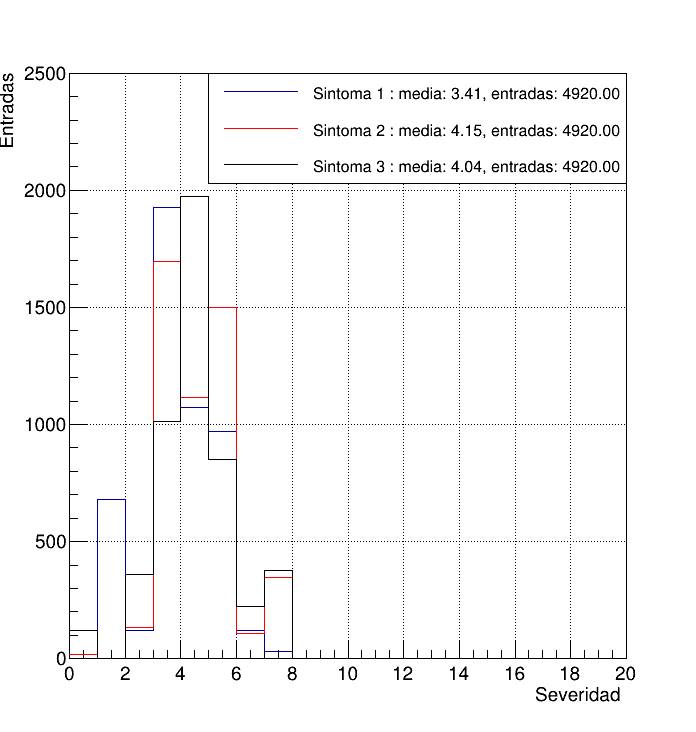

In [33]:
T1 = TH1F("Sintoma 1","",20, 0, 20)
sin_uno = severidad_nuevo['Symptom_1'].values

T2 = TH1F("Sintoma 2","",20, 0, 20)
sin_dos = severidad_nuevo['Symptom_2'].values

T3 = TH1F("Sintoma 3","",20, 0, 20)
sin_tres = severidad_nuevo['Symptom_3'].values

#T4 = TH1F("Sintoma 4","",20, 0, 20)
#sin_cuatro = severidad_nuevo['Symptom_4'].values

for a in sin_uno:
   T1.Fill(a)

for b in sin_dos:
   T2.Fill(b)

for c in sin_tres:
   T3.Fill(c)

#for d in sin_cuatro:
#   T4.Fill(d)

T1.SetStats(0)
T2.SetLineColor(kRed )
T3.SetLineColor(kBlack )
#T4.SetLineColor(kCyan)
#T1.GetYaxis().SetLabelOffset(-0.1)

mean_uno = T1.GetMean()
entries_uno = T1.GetEntries()

mean_dos = T2.GetMean()
entries_dos = T2.GetEntries()

mean_tres = T3.GetMean()
entries_tres = T3.GetEntries()

#mean_cuatro = T4.GetMean()
#entries_cuatro = T4.GetEntries()

T1.SetMaximum(2500)
T1.GetYaxis().SetLabelSize(0.03)
T1.GetYaxis().SetTitleSize(0.03)
T1.GetXaxis().SetLabelSize(0.03)
T1.GetXaxis().SetTitleSize(0.03)
c = TCanvas("T1", "canvas", 700 , 760)
T1.Draw("")
T2.Draw("SAME")
T3.Draw("SAME")
#T4.Draw("SAME")
legend = ROOT.TLegend(0.3, 0.75, 0.9, 0.9)
legend.SetTextSize(0.025)
legend.AddEntry(T1, f"Sintoma 1 : media: {mean_uno:.2f}, entradas: {entries_uno:.2f}", "l")
legend.AddEntry(T2, f"Sintoma 2 : media: {mean_dos:.2f}, entradas: {entries_dos:.2f}", "l")
legend.AddEntry(T3, f"Sintoma 3 : media: {mean_tres:.2f}, entradas: {entries_tres:.2f}", "l")
#legend.AddEntry(T4, f"Sintoma 4 : media: {mean_cuatro:.2f}, entradas: {entries_cuatro:.2f}", "l")
legend.Draw()

T1.SetTitle(";Severidad ; Entradas")
c.Draw()
c.SetGrid()
#c0.SaveAs('energy_dist.png')

correlacion entre estos datos

Plot de correlación:

<ipython-input-34-836fa73fd065>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = severidad_nuevo.corr(method = 'pearson')


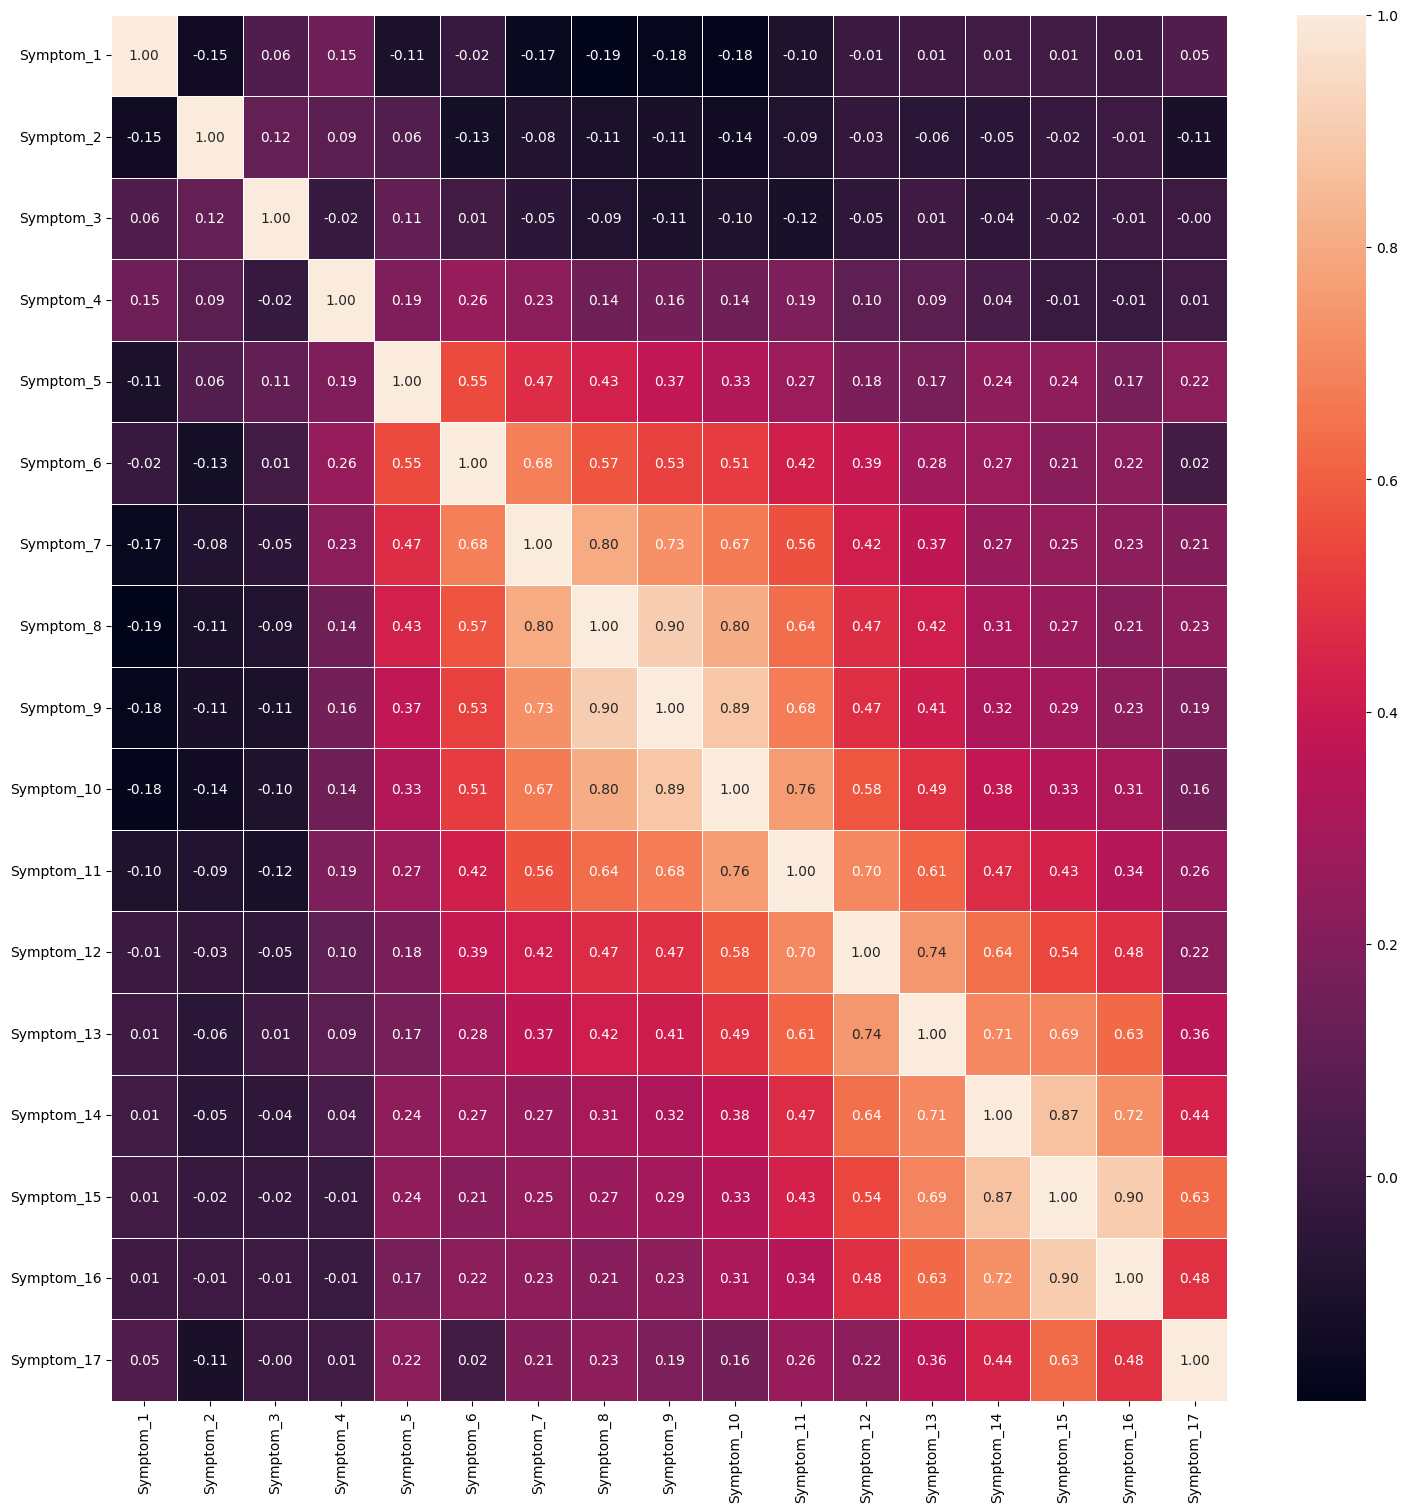

In [34]:
correlation_matrix = severidad_nuevo.corr(method = 'pearson')

fig, ax = plt.subplots(figsize=(18 ,18 ))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(correlation_matrix , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

<ipython-input-35-3c54593e8f86>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_sp = severidad_nuevo.corr(method='spearman')


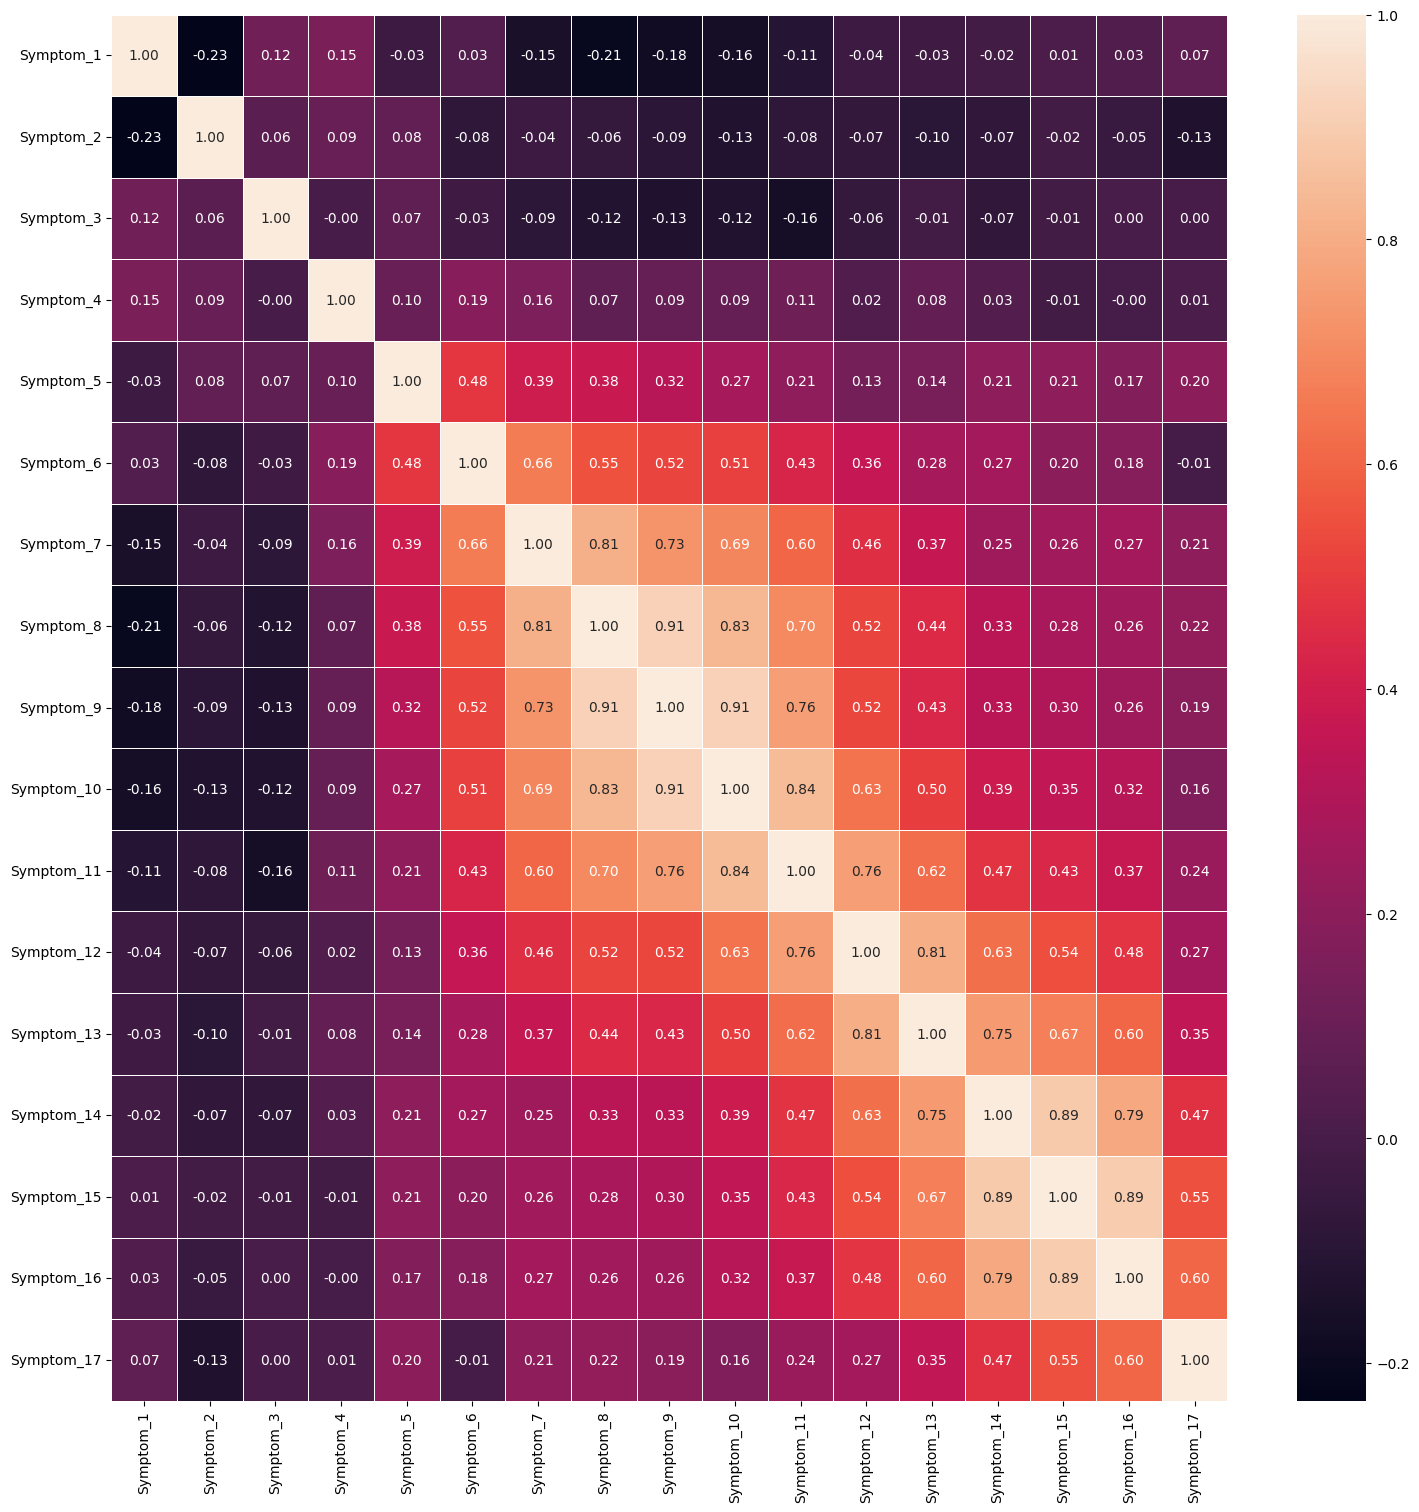

In [35]:
correlation_matrix_sp = severidad_nuevo.corr(method='spearman')

fig, ax = plt.subplots(figsize=(18 ,18 ))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(correlation_matrix_sp , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

<ipython-input-36-6e7d8bf477f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_kend = severidad_nuevo.corr(method='kendall')


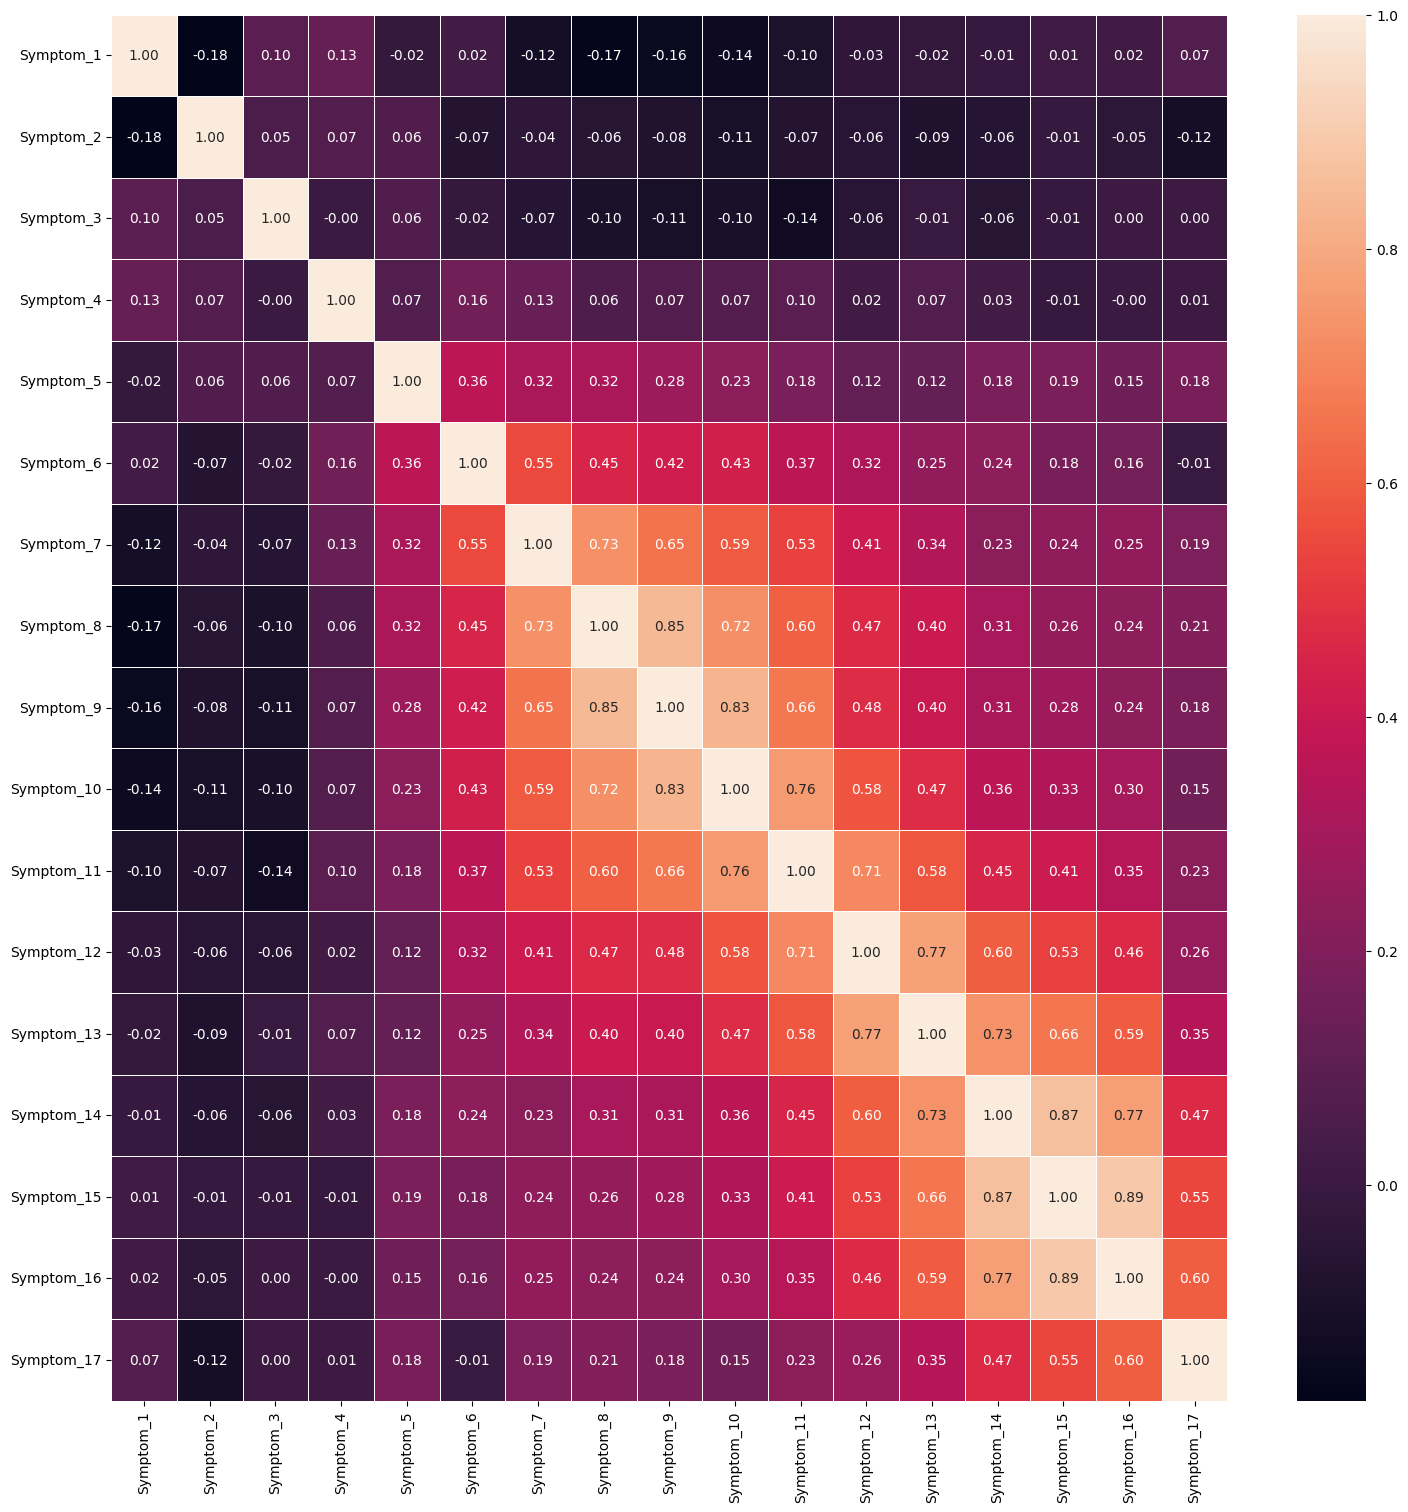

In [36]:
correlation_matrix_kend = severidad_nuevo.corr(method='kendall')

fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix_kend , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()



In [37]:
dat = severidad_nuevo.drop(['Disease'],axis=1)
#dat = dat.reset_index(drop=True, inplace=True)
#dat.tail()
dat.head()

Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0          1          3          4          0          0          0   
1          3          4          0          0          0          0   
2          1          4          0          0          0          0   
3          1          3          0          0          0          0   
4          1          3          4          0          0          0   

   Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           0           0   

   Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0           0           0           0           0           0  
1           0           0           0           0           0  
2           0           0           0           0           0  
3           0           0           0           0           0  
4           0           0           0           0           0

In [38]:
#datos = severidad_nuevo.iloc[:,1:].values
target = severidad_nuevo['Disease'].values
target

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

Vamos a separar el conjunto de datos entre    

In [39]:
print(target[0])

Fungal infection


In [40]:
x_train, x_test, y_train, y_test = train_test_split(dat, target, shuffle=True, train_size = 0.7)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3444, 17) (1476, 17) (3444,) (1476,)


Parte del  entrenamiento

<ipython-input-41-b73ff06e5414>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( severidad_nuevo.iloc[:,1:].values[k], ax = ax1[i][j], color = 'red')
<ipython-input-41-b73ff06e5414>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( severidad_nuevo.iloc[:,1:].values[k], ax = ax1[i][j], color = '

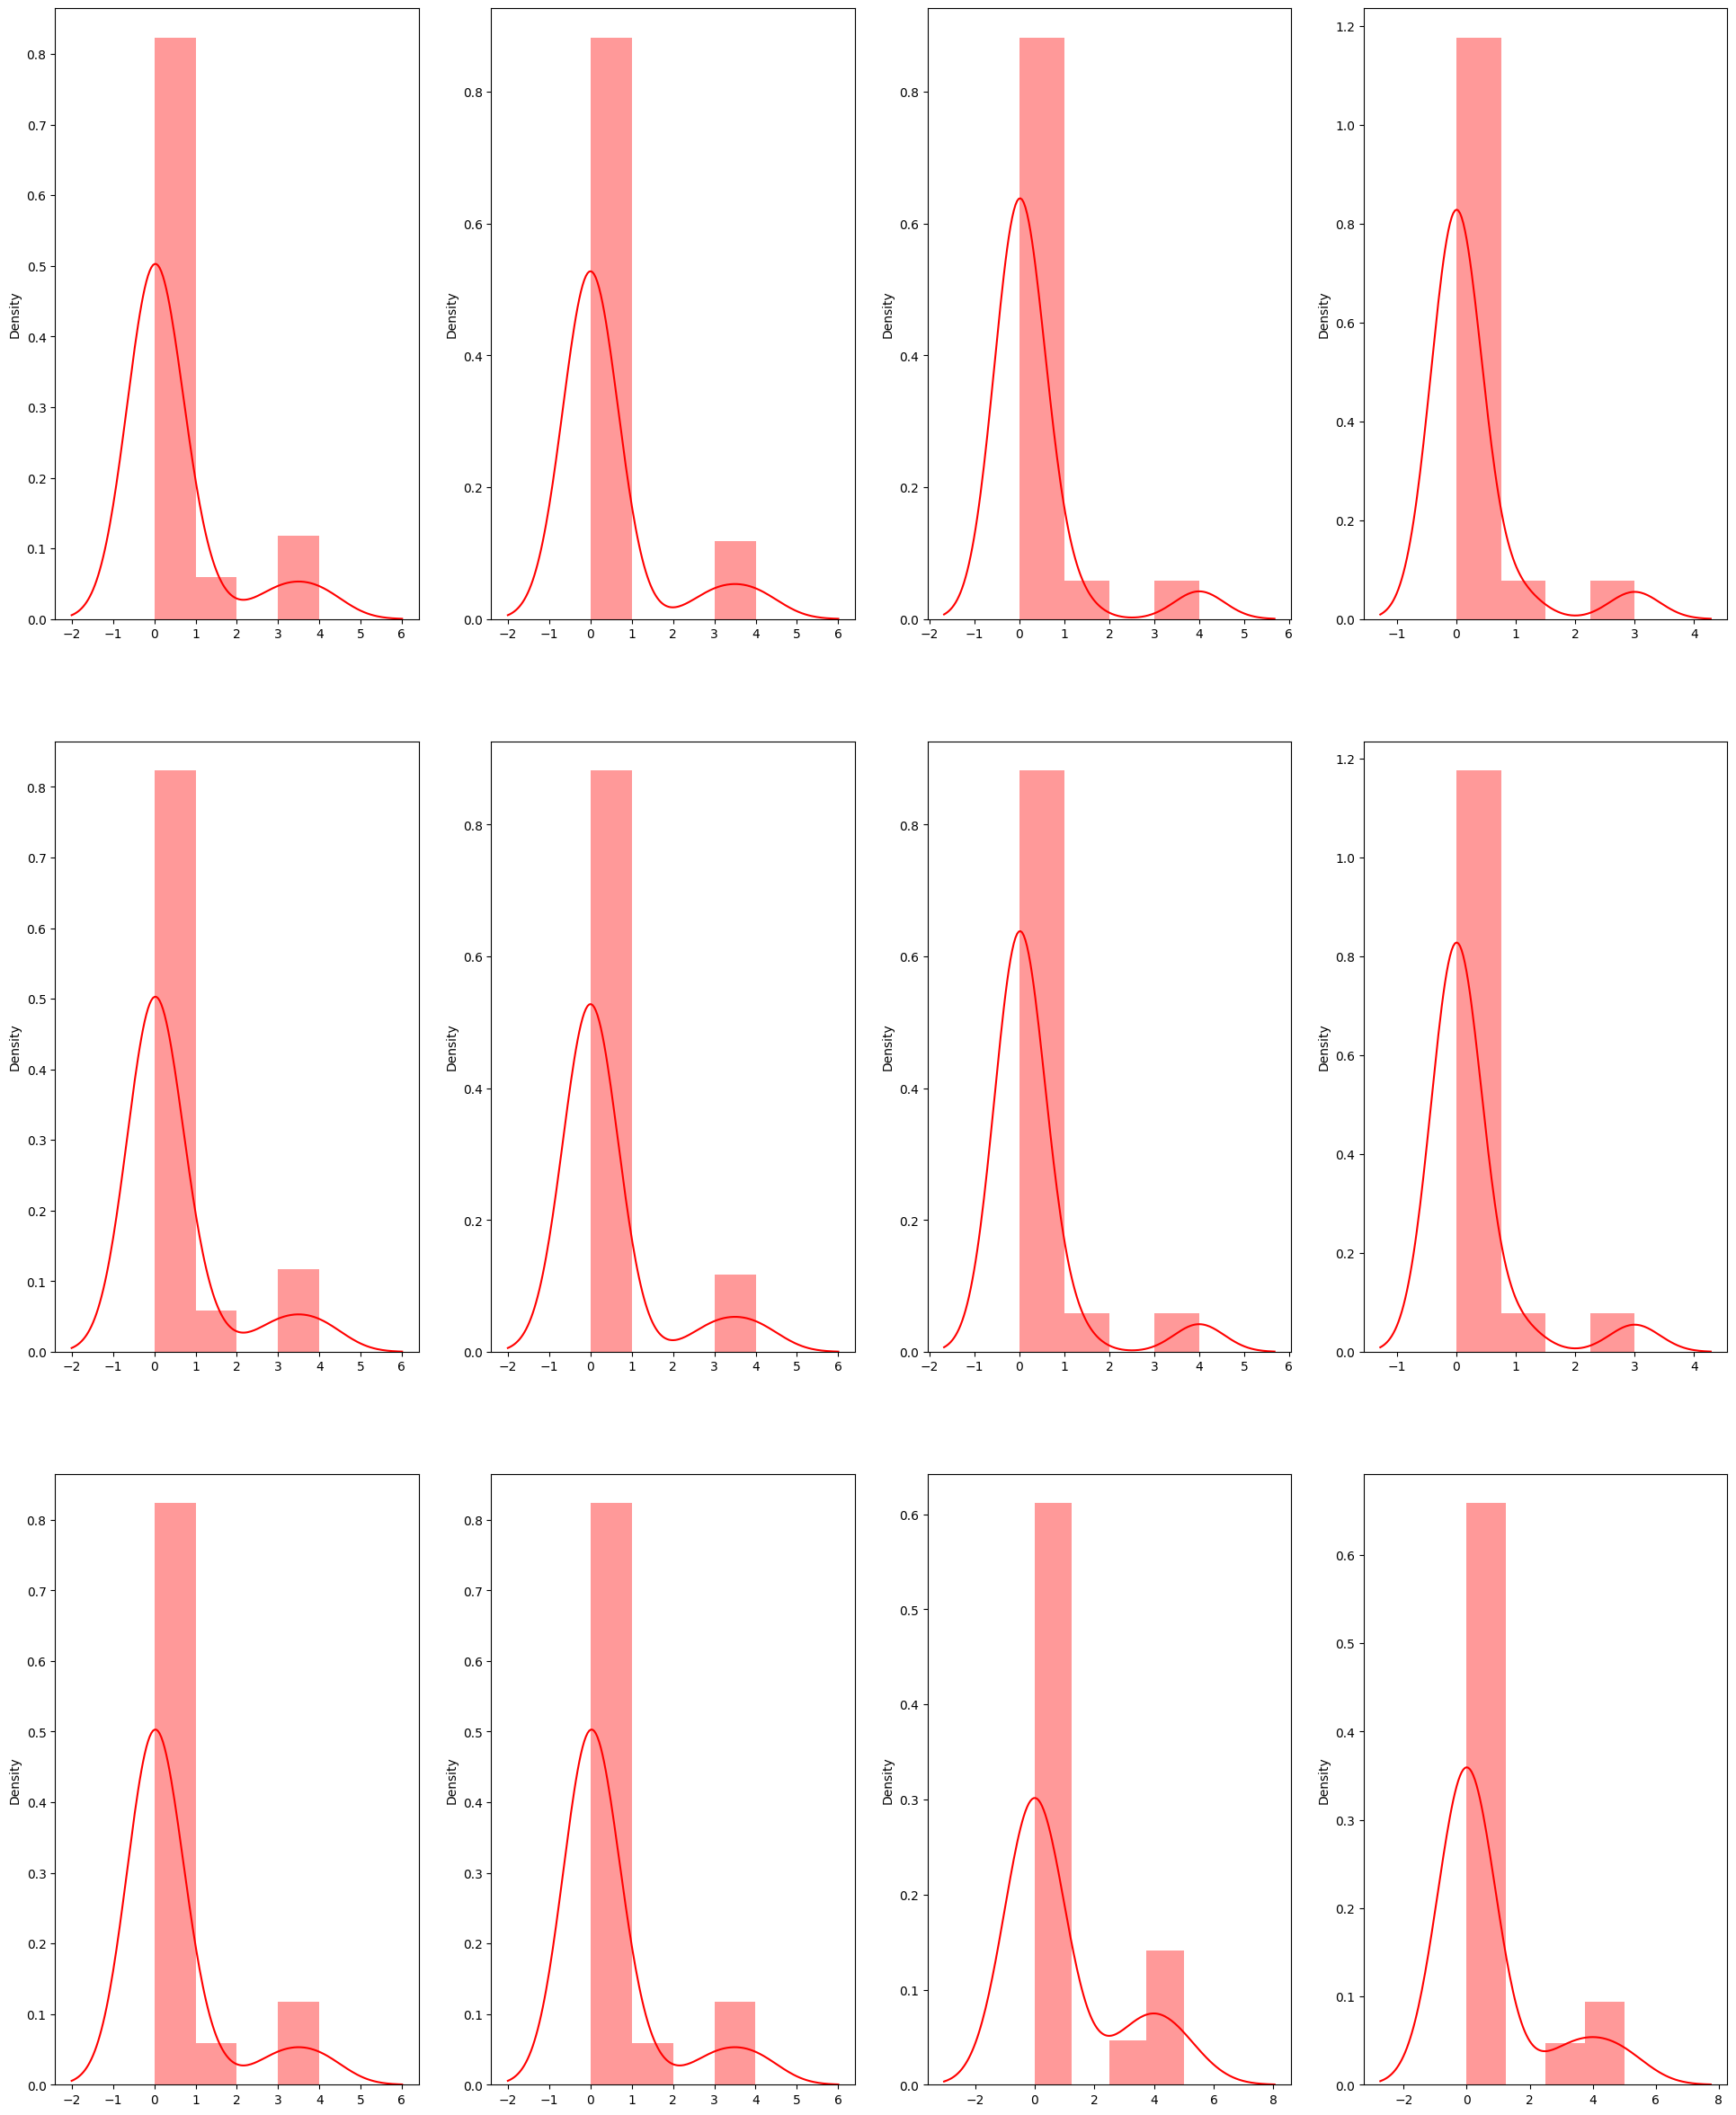

In [41]:
color = sns.color_palette("pastel")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0

#columns = list(severidad_nuevo.columns)
for i in range(3):
    for j in range(4):
            sns.distplot( severidad_nuevo.iloc[:,1:].values[k], ax = ax1[i][j], color = 'red')
            k += 1
#plt.show()

In [ ]:
#plt.figure(figsize=(20,20))
#sns.heatmap(data.corr(),annot=True, cmap='rainbow',linewidth=0.5, fmt='.2f');

Random Forest

In [42]:
rf_model = RandomForestClassifier(max_depth=1 , n_estimators = 10, random_state=0,    oob_score=True  )
start = time.time()
rf_model.fit(x_train , y_train )
stop = time.time()
print(f"Training time: {stop - start}s")
#rf_model = fRandomForestClassifier(max_depth=1 , n_estimators = 10, random_state=0)

#tr = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=25)

Training time: 0.07137370109558105s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [43]:
pred_forest = rf_model.predict(x_test)
pred_forest

array(['Acne', 'Impetigo', 'Typhoid', ..., 'Bronchial Asthma', 'Acne',
       'Typhoid'], dtype=object)

Accuracy

In [44]:
rf_model.score(x_test, y_test)

0.18766937669376693

In [45]:
#importnace fearues plot:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

La media ....  (MDI por sus siglas en inglés)

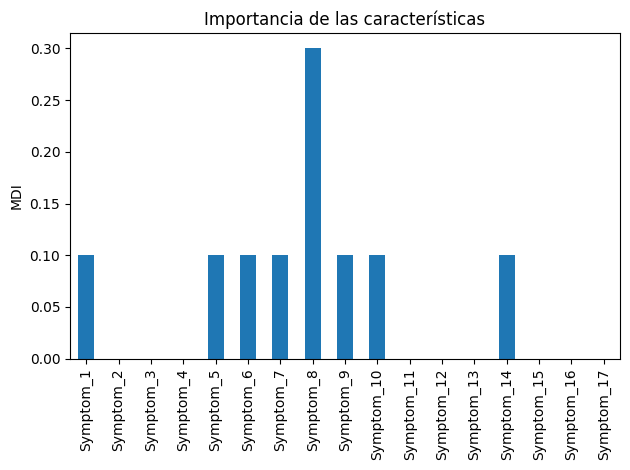

In [46]:
forest_importances = pd.Series(importances, index = dat.columns )

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
forest_importances.plot.bar(ax=ax)
ax.set_title("Importancia de las características")
ax.set_ylabel("MDI")
fig.tight_layout()

In [47]:
IMP = rf_model.feature_importances_.argsort()
print("idex order rf:")
print(IMP)

idex order rf:
[16  1  2  3 14 12 11 15 10 13  0  6  5  4  9  8  7]


Salvar modelo para usar en otro esquema:

In [48]:
pickle.dump(rf_model , open("rf.pickle.dat", "wb"))

[Text(0.5, 0.75, 'x[8] <= 3.5\ngini = 0.975\nsamples = 2177\nvalue = [73, 86, 99, 83, 84, 84, 85, 69, 83, 79, 94, 84\n78, 72, 101, 62, 95, 94, 69, 81, 84, 90, 70, 85\n73, 83, 90, 103, 90, 107, 75, 84, 84, 79, 91, 80\n62, 94, 92, 95, 78]'),
 Text(0.25, 0.25, 'gini = 0.965\nsamples = 1533\nvalue = [73, 86, 99, 83, 84, 84, 85, 69, 0, 79, 0, 0, 0\n72, 101, 62, 95, 94, 69, 0, 84, 37, 0, 85, 73\n0, 0, 103, 90, 107, 75, 84, 84, 79, 0, 80, 0\n0, 92, 95, 0]'),
 Text(0.75, 0.25, 'gini = 0.921\nsamples = 644\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 83, 0, 94, 84, 78, 0\n0, 0, 0, 0, 0, 81, 0, 53, 70, 0, 0, 83, 90\n0, 0, 0, 0, 0, 0, 0, 91, 0, 62, 94, 0, 0, 78]')]

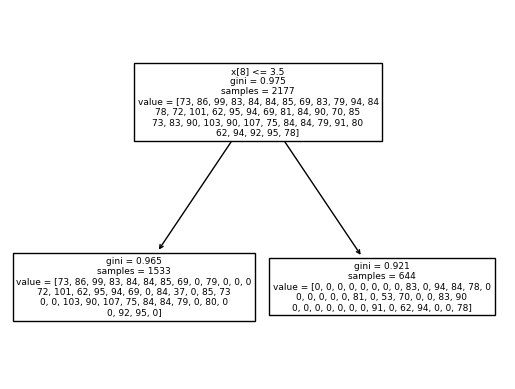

In [49]:
tree.plot_tree(rf_model.estimators_[0])

Arboles

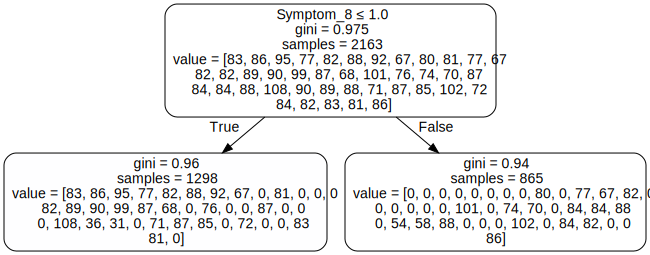

In [50]:
ss = tree.export_graphviz(rf_model.estimators_[1] , out_file=None, feature_names=dat.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(ss)
graph

Error Out-of-Bag

In [51]:
OOB=rf_model.oob_score_
print("OOB error:")
print(OOB)

OOB error:
0.09349593495934959


In [52]:
conf_mat_forest = confusion_matrix(y_test, pred_forest)
print(  conf_mat_forest  )

[[ 0  0  0 ...  0  0  0]
 [ 0  0 36 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0 34 ...  0  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  0  0  0]]


F1-score% = 9.97961739015245 | Accuracy% = 18.766937669376695


<Axes: >

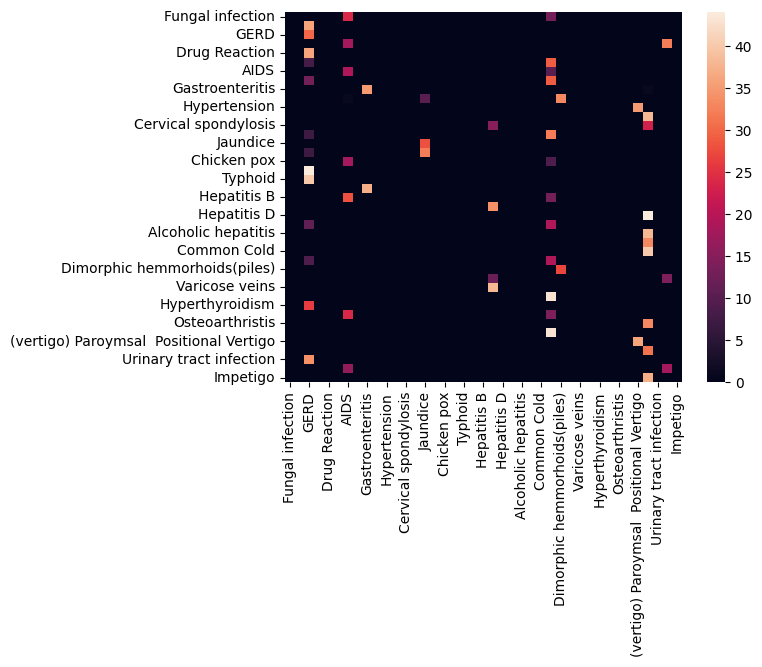

In [53]:
df_forest = pd.DataFrame(conf_mat_forest, index=severidad_nuevo['Disease'].unique(), columns=severidad_nuevo['Disease'].unique())

print('F1-score% =', f1_score(y_test, pred_forest , average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, pred_forest)*100)
sns.heatmap(df_forest)

In [ ]:
#label_y_cat = LabelBinarizer().fit(y_test )
#y_t = label_y_cat.transform(y_test)
#y_t.shape

In [54]:
label_binarizer = LabelBinarizer().fit(y_train)
y_t = label_binarizer.transform(y_test)
y_t.shape  # (n_samples, n_classes)

(1476, 41)

In [55]:
print(y_t)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
class_of_interest = "GERD"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

16

In [57]:
#label_binarizer = LabelBinarizer().fit(y_train)
y_p = label_binarizer.transform( pred_forest)
y_p.shape  # (n_samples, n_classes)

(1476, 41)

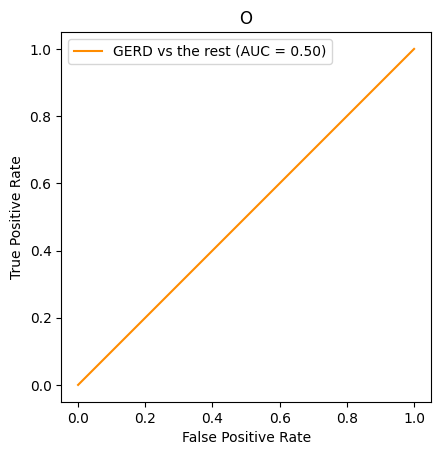

In [58]:
#fpr, tpr, thresholds = metrics.roc_curve(y, pred)

RocCurveDisplay.from_predictions(
    y_t[:, class_id],
    y_p[:, class_id],
  #  pp,
    name=f"{class_of_interest} vs the rest",
    color="darkorange")
#  plot_chance_level=True,
#  plot_chance_level= True )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("O")
plt.legend()
plt.show()

Text(0.5, 1.0, 'O')

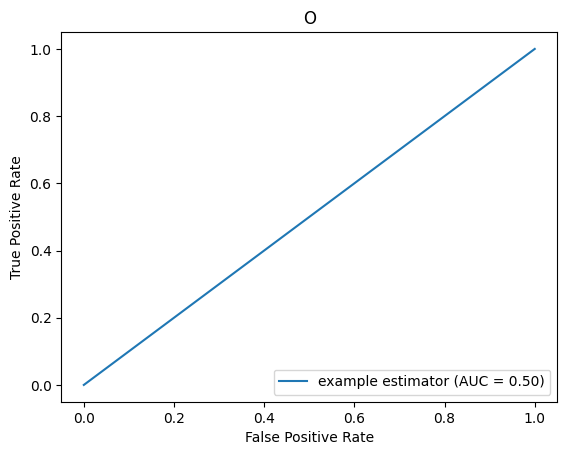

In [59]:
#y = np.array([0, 0, 1, 1])
#pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve( y_t[:, class_id] ,  y_p[:, class_id] )
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("O")

Gradient Boosting

In [61]:
#Boosting
GB = GradientBoostingClassifier (n_estimators=10, random_state=30  ,max_depth=1  )

In [62]:
start = time.time()
GB.fit(x_train , y_train )
stop = time.time()
print(f"Training time: {stop - start}s")

#joblib.dump(R, "./random_forest.joblib",compress=5)

Training time: 2.856477737426758s


In [63]:
pred_gb = GB.predict(x_test)
pred_gb

array(['AIDS', 'Hypertension', 'Hyperthyroidism', ...,
       'Alcoholic hepatitis', 'Gastroenteritis', 'hepatitis A'],
      dtype=object)

Salvar el modelo

In [64]:
# save model to file
pickle.dump(GB, open("gb.pickle.dat", "wb"))

In [65]:
IMP2 = GB.feature_importances_.argsort()
print("index order boosting:")
print(IMP2)

index order boosting:
[13  6  9 16 11 12 10  5 14  7  4  3 15  8  2  0  1]


In [66]:
GB.score(x_test, y_test)

0.8495934959349594

In [67]:
conf_mat_gb = confusion_matrix(y_test, pred_gb)
print(  conf_mat_gb  )

[[33  0  0 ...  0  0  0]
 [ 0 26  0 ...  5  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  4 ... 30  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 0  0  0 ...  0  0 37]]


F1-score% = 84.30468017730247 | Accuracy% = 84.95934959349594


<Axes: >

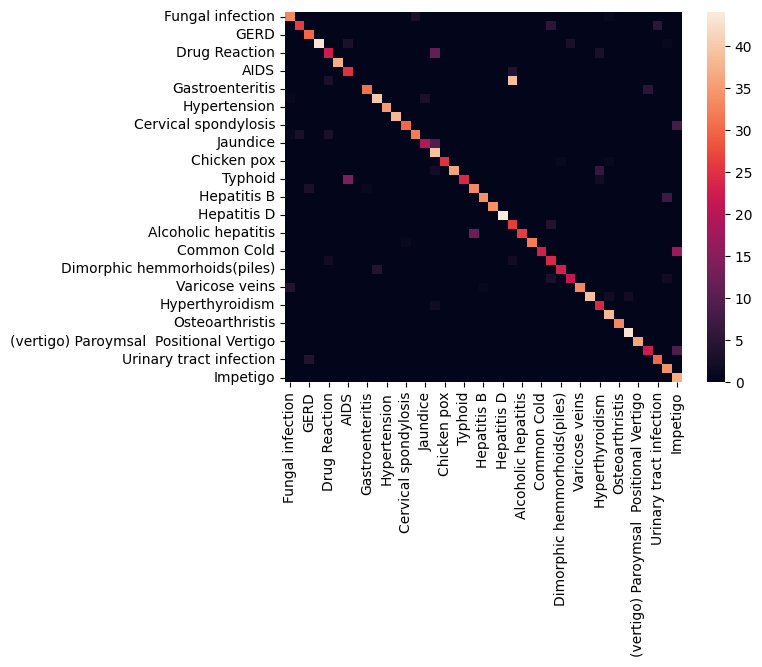

In [68]:
df_gb = pd.DataFrame(conf_mat_gb, index=severidad_nuevo['Disease'].unique(), columns=severidad_nuevo['Disease'].unique())

print('F1-score% =', f1_score(y_test, pred_gb , average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, pred_gb)*100)
sns.heatmap(df_gb)

In [69]:
#label_binarizer = LabelBinarizer().fit(y_train)
y_gb = label_binarizer.transform( pred_gb)
y_gb.shape  # (n_samples, n_classes)

(1476, 41)

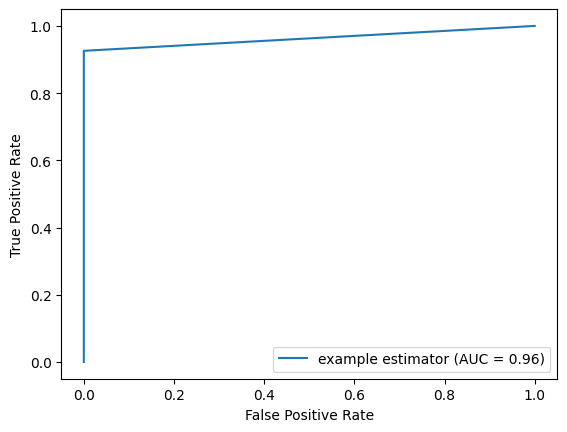

In [70]:
fpr, tpr, thresholds = metrics.roc_curve( y_t[:, class_id] ,  y_gb[:, class_id] )
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

Supor Vector Machine (Máquina de vector soporte)

In [ ]:
#xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

SVC

In [71]:
svc_model = SVC()

start = time.time()
svc_model.fit(x_train, y_train)
stop = time.time()

print(f"Training time: {stop - start}s")

Training time: 0.154771089553833s


In [72]:
pred_svc = svc_model.predict(x_test)

In [73]:
pickle.dump(svc_model, open("svc.pickle.dat", "wb"))

Vamos a crear la matriz de confusión:

In [74]:
conf_mat_svc = confusion_matrix(y_test, pred_svc)

In [75]:
conf_mat_svc = confusion_matrix(y_test, pred_svc)
print(  conf_mat_svc  )

[[33  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 0  0  0 ...  0  0 37]]


F1-score% = 93.74884389066115 | Accuracy% = 93.97018970189703


<Axes: >

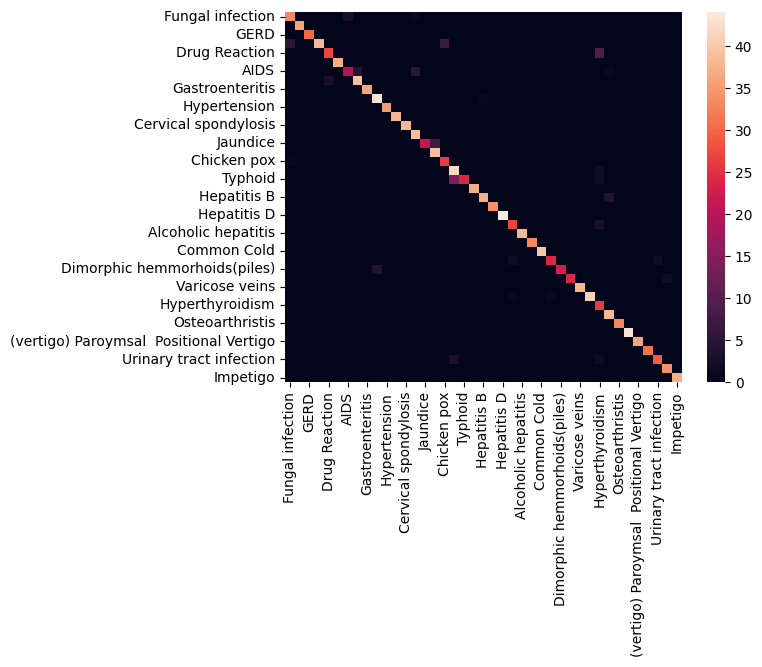

In [76]:
df_svc = pd.DataFrame(conf_mat_svc, index=severidad_nuevo['Disease'].unique(), columns=severidad_nuevo['Disease'].unique())

print('F1-score% =', f1_score(y_test, pred_svc , average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, pred_svc)*100)
sns.heatmap(df_svc)

In [77]:
y_svm = label_binarizer.transform( pred_svc)
y_svm.shape  # (n_samples, n_classes)

(1476, 41)

Text(0.5, 1.0, 'O')

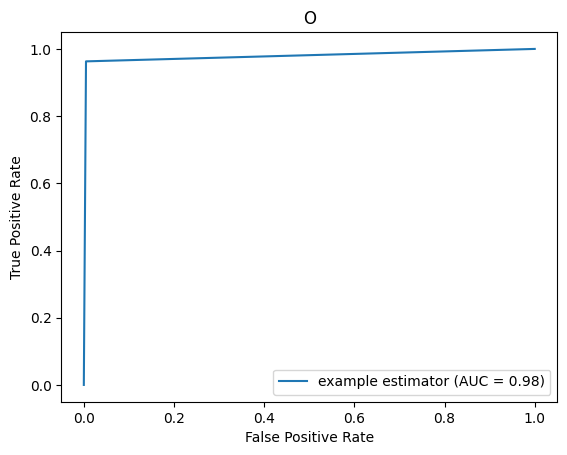

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_t[:, class_id] ,  y_svm[:, class_id] )
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("O")

Random Forest mejorado

In [79]:
rf_model_dos = RandomForestClassifier(max_depth=10, n_estimators = 100, random_state=0 ,  oob_score=True  )
start = time.time()
rf_model_dos.fit(x_train , y_train )
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.5932934284210205s


In [80]:
pred_forest_dos = rf_model_dos.predict(x_test)

In [81]:
#importnace fearues plot:
importances_dos = rf_model_dos.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_dos.estimators_], axis=0)

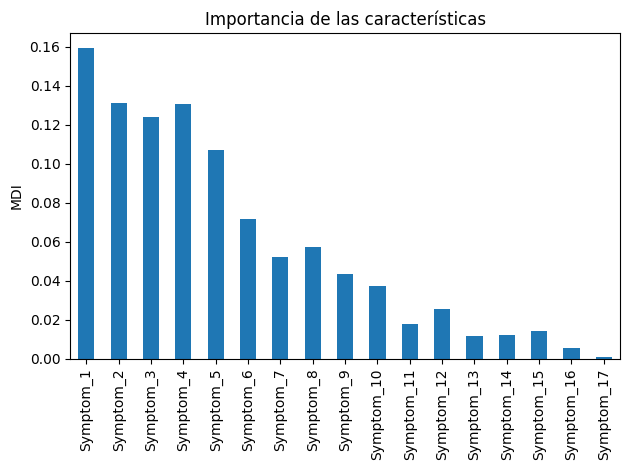

In [82]:
forest_importances_dos = pd.Series(importances_dos, index = dat.columns )

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
forest_importances_dos.plot.bar(ax=ax)
ax.set_title("Importancia de las características")
ax.set_ylabel("MDI")
fig.tight_layout()

In [83]:
IMP3 = rf_model_dos.feature_importances_.argsort()
print("idex order rf dos:")
print(IMP3)

idex order rf dos:
[16 15 12 13 14 10 11  9  8  6  7  5  4  2  3  1  0]


In [84]:
OOB3=rf_model_dos.oob_score_
print("OOB3 error:")
print(OOB3)

OOB3 error:
0.9898373983739838


In [85]:
pickle.dump(rf_model_dos , open("rf_dos.pickle.dat", "wb"))

El índice Gini en los árboles de decisión:

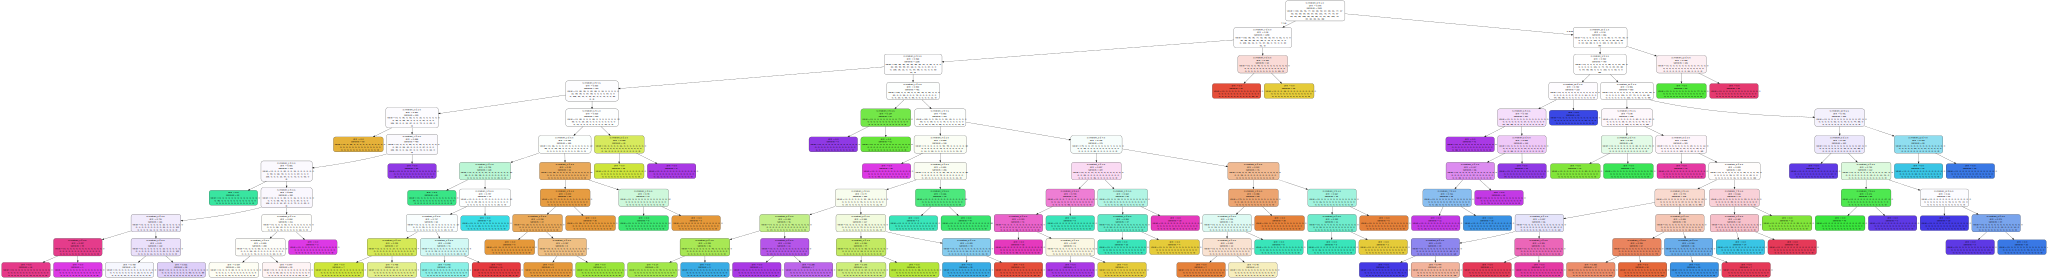

In [86]:
sx = tree.export_graphviz(rf_model_dos.estimators_[1] , out_file=None, feature_names=dat.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(sx)
graph

In [87]:
conf_mat_forest_dos = confusion_matrix(y_test, pred_forest_dos)
print(  conf_mat_forest_dos  )

[[37  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 34  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 0  0  0 ...  0  0 37]]


F1-score% = 99.3163066589906 | Accuracy% = 99.39024390243902


<Axes: >

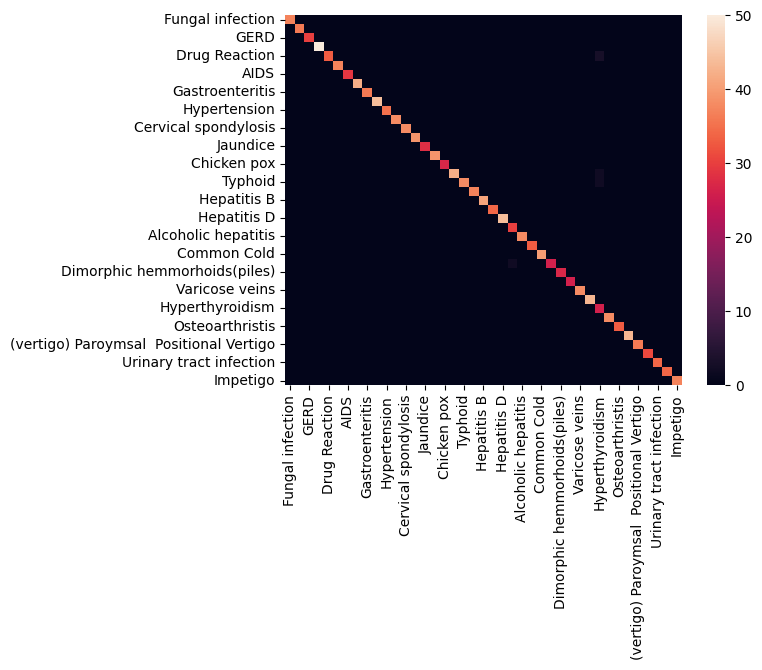

In [88]:
df_forest_dos = pd.DataFrame(conf_mat_forest_dos , index=severidad_nuevo['Disease'].unique(), columns=severidad_nuevo['Disease'].unique())

print('F1-score% =', f1_score(y_test, pred_forest_dos , average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, pred_forest_dos)*100)
sns.heatmap(df_forest_dos)

In [89]:
y_rff = label_binarizer.transform( pred_forest_dos)
y_rff.shape  # (n_samples, n_classes)

(1476, 41)

Text(0.5, 1.0, 'O')

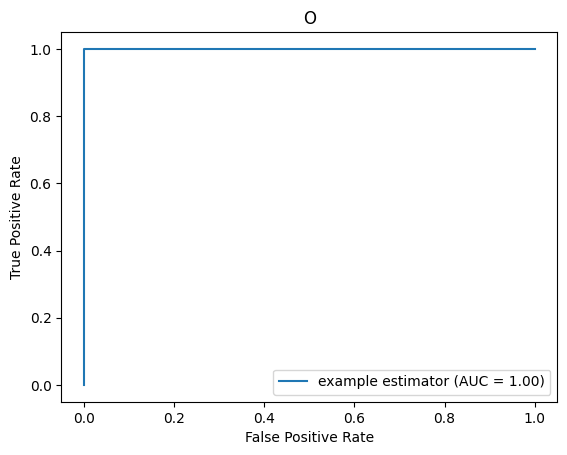

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_t[:, class_id] ,  y_rff[:, class_id] )
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("O")

Entrenamiento con caracteristicas reducidas: si se reducne indices de correlacion con mas de 0.8 para pearson,





viendo son



fuera symtopa 16 si tienes 15

fuera symtopa 14 si tienes 15

fuera symtopa 7 si tienes 8

fuera symtopa 9 si tienes 8

fuera symtopa 11 si tienes 10

Entonces vamos a filtrar

In [ ]:
#severidad_nuevo.head()

In [91]:
severidad_reducido =pd.DataFrame(severidad_nuevo[[
'Disease',
'Symptom_1',
'Symptom_2',
'Symptom_3',
'Symptom_4',
'Symptom_5',
'Symptom_6',
#'Sympton_7',
'Symptom_8',
#'Sympton_9',
'Symptom_10',
#'Sympton_11',
'Symptom_12',
'Symptom_13',
#'Sympton_14',
'Symptom_15',
#'Sympton_16',
'Symptom_17',
] ]  )

revisar con pearson de nuevo:

<ipython-input-92-b80830aca8fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_sp_dos = severidad_reducido.corr(method='spearman')


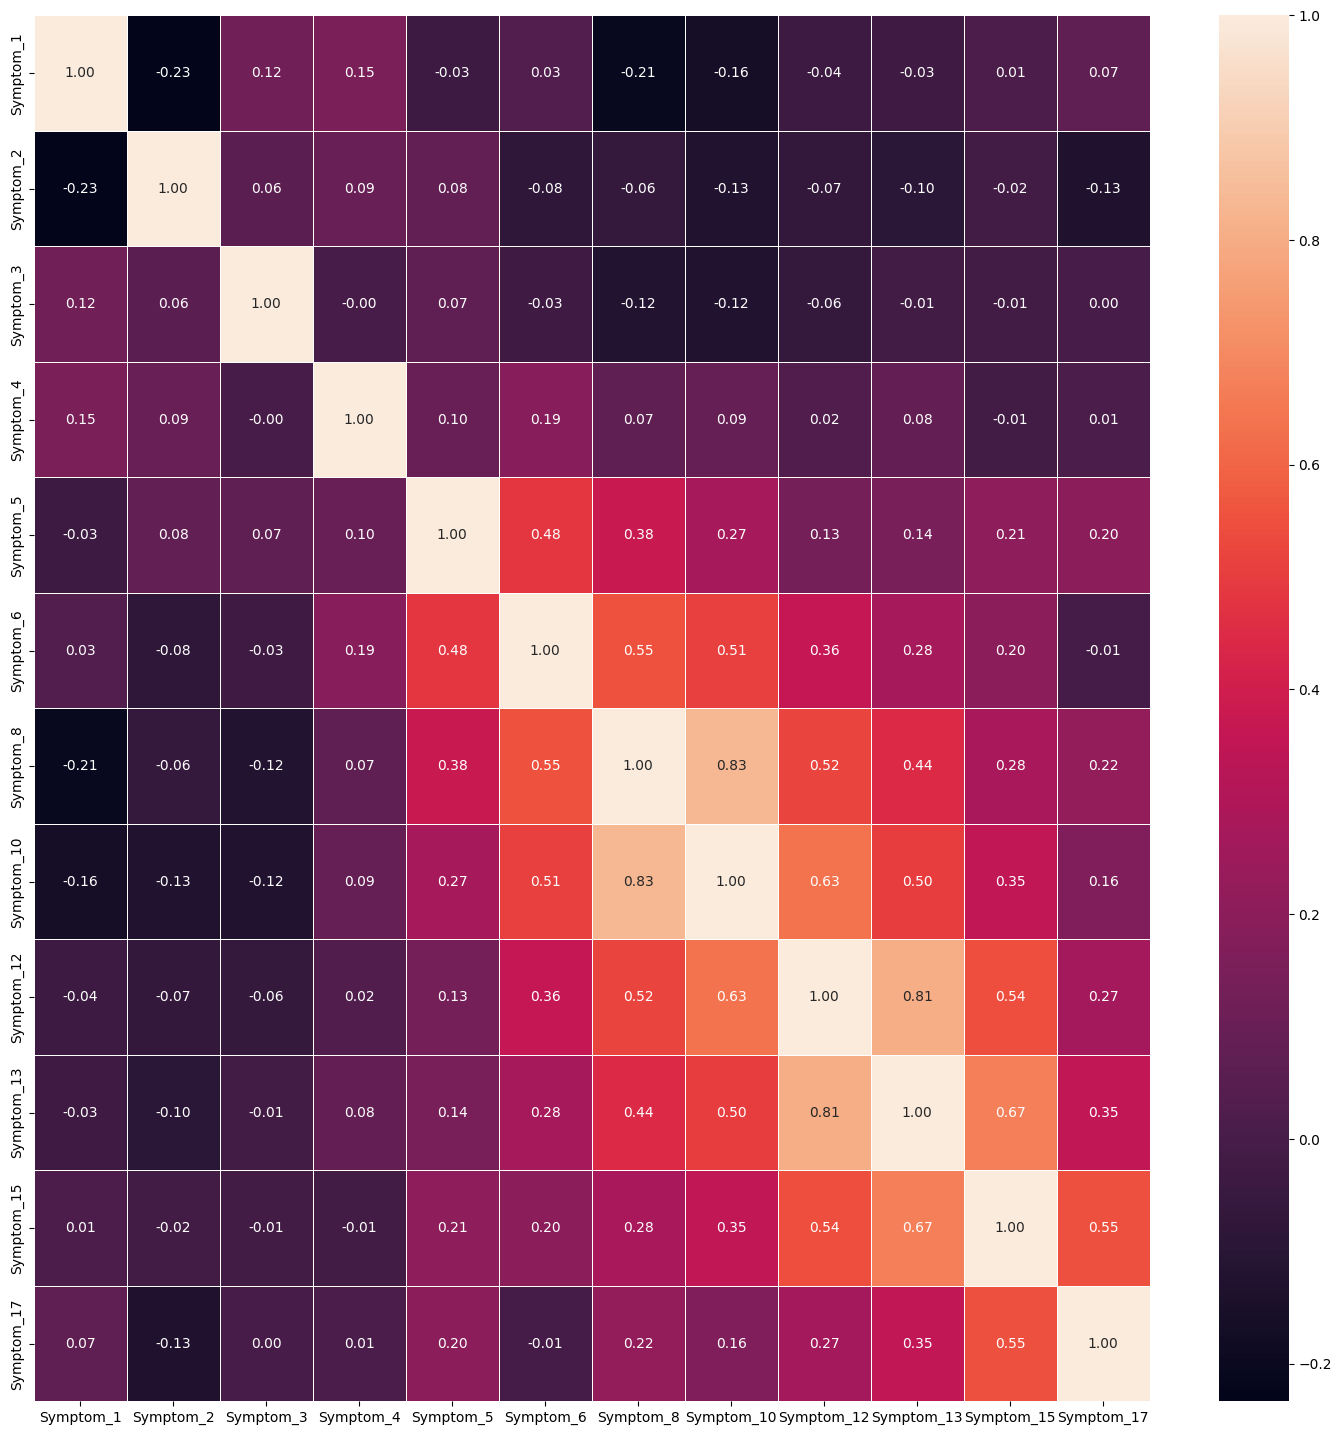

In [92]:
correlation_matrix_sp_dos = severidad_reducido.corr(method='spearman')

fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix_sp_dos , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

<ipython-input-93-270618b5159e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_pers_dos = severidad_reducido.corr(method='pearson')


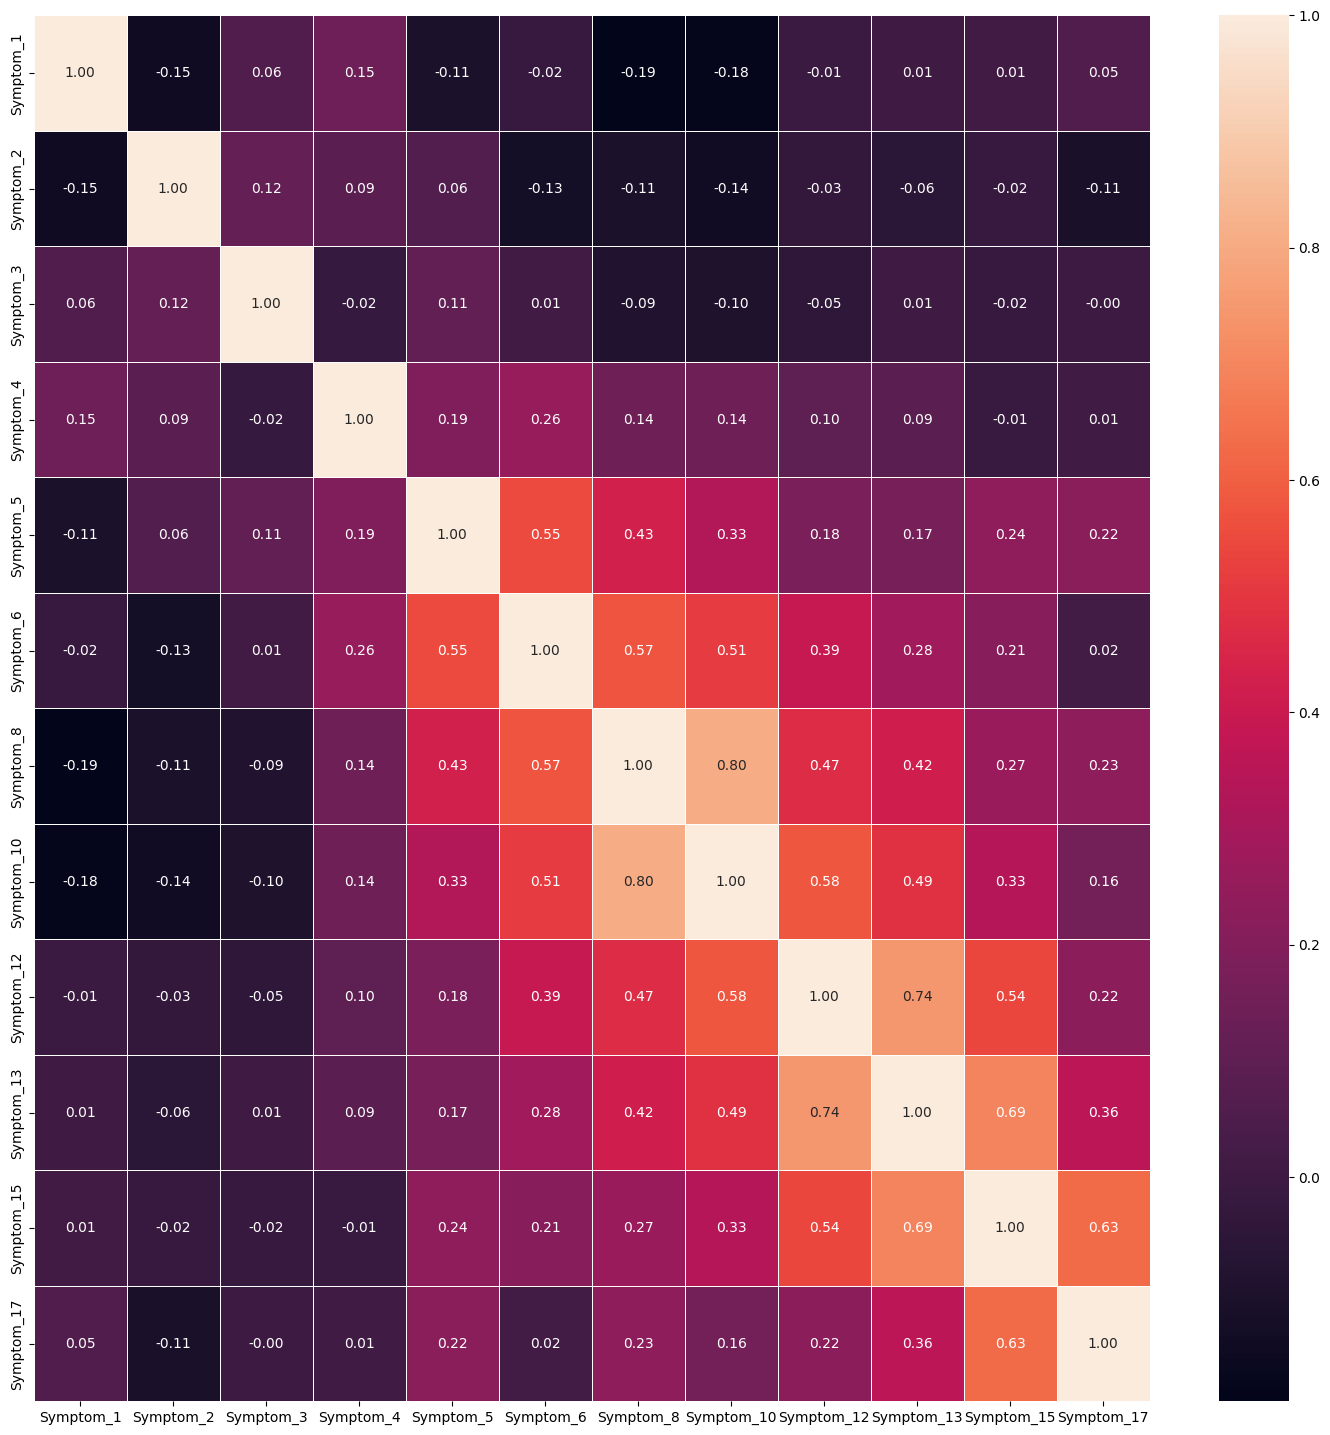

In [93]:
correlation_matrix_pers_dos = severidad_reducido.corr(method='pearson')

fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix_pers_dos , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

<ipython-input-94-96b27e5d135b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_ken_dos = severidad_reducido.corr( method='kendall')


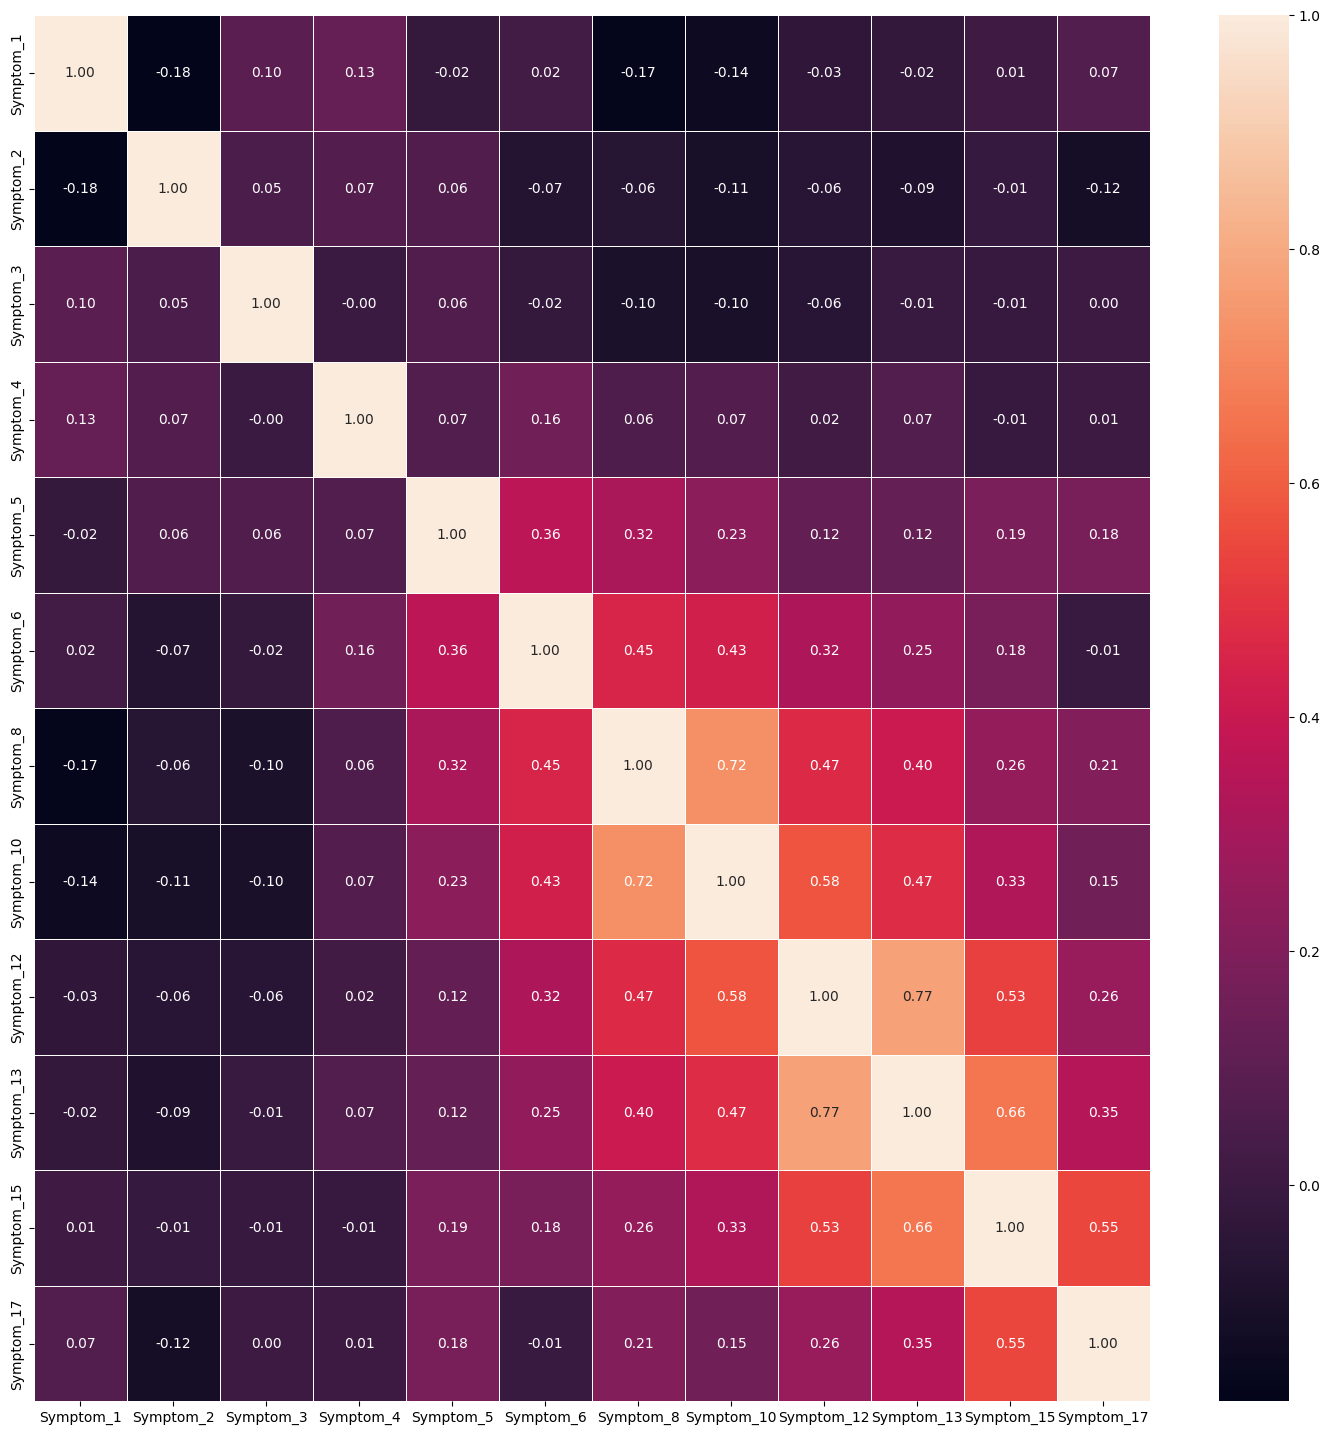

In [94]:

correlation_matrix_ken_dos = severidad_reducido.corr( method='kendall')
fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix_ken_dos , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

In [ ]:
#datos = severidad_reducido.iloc[:,1:].values
#datos

In [95]:
datos = severidad_reducido.drop(['Disease'],axis=1)
#dat = dat.reset_index(drop=True, inplace=True)
#dat.tail()
datos.head()

Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0          1          3          4          0          0          0   
1          3          4          0          0          0          0   
2          1          4          0          0          0          0   
3          1          3          0          0          0          0   
4          1          3          4          0          0          0   

   Symptom_8  Symptom_10  Symptom_12  Symptom_13  Symptom_15  Symptom_17  
0          0           0           0           0           0           0  
1          0           0           0           0           0           0  
2          0           0           0           0           0           0  
3          0           0           0           0           0           0  
4          0           0           0           0           0           0

In [96]:
target = severidad_reducido['Disease'].values
target

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [97]:
x_train_dos, x_test_dos, y_train_dos, y_test_dos = train_test_split(datos, target, shuffle=True, train_size = 0.7)
print(x_train_dos.shape, x_test_dos.shape, y_train_dos.shape, y_test_dos.shape)

(3444, 12) (1476, 12) (3444,) (1476,)


In [98]:
rf_model_tres = RandomForestClassifier(max_depth=10, n_estimators = 100, random_state=0 ,  oob_score=True  )
start = time.time()
rf_model_tres.fit(x_train_dos , y_train_dos )
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.3662693500518799s


In [99]:
pred_forest_tres = rf_model_tres.predict(x_test_dos)

In [100]:
sc_rf_dos = rf_model_tres.score(x_test_dos , y_test_dos)
sc_rf_dos

0.9925474254742548

In [101]:
#importnace fearues plot:
importances_tres = rf_model_tres.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_tres.estimators_], axis=0)

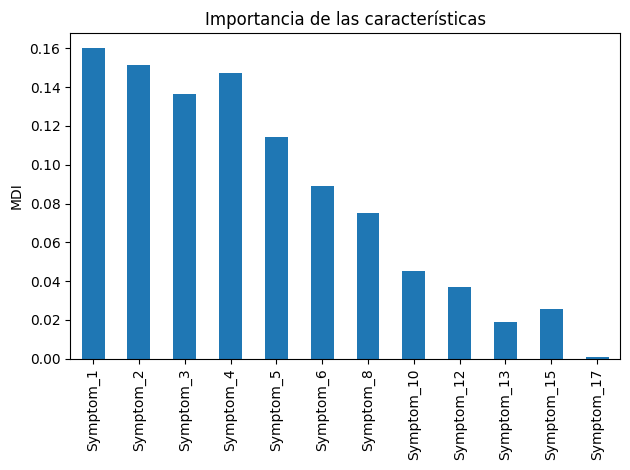

In [102]:
forest_importances_tres = pd.Series(importances_tres, index = datos.columns )

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
forest_importances_tres.plot.bar(ax=ax)
ax.set_title("Importancia de las características")
ax.set_ylabel("MDI")
fig.tight_layout()

In [103]:
IMP4 = rf_model_tres.feature_importances_.argsort()
print("idex order rf tres:")
print(IMP4)

idex order rf tres:
[11  9 10  8  7  6  5  4  2  3  1  0]


In [104]:
OOB4=rf_model_tres.oob_score_
print("OOB4 error:")
print(OOB4)

OOB4 error:
0.9915795586527294


In [105]:
pickle.dump(rf_model_tres, open("rf_tres.pickle.dat", "wb"))

In [ ]:
#sxx = tree.export_graphviz(rf_model_tres.estimators_[2] , out_file=None, feature_names=dat.columns, filled=True, rounded=True, special_characters=True)
#graph = graphviz.Source(sxx)
#graph

In [106]:
conf_mat_forest_tres = confusion_matrix(y_test_dos, pred_forest_tres)
print(  conf_mat_forest_tres  )

[[42  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  0]
 [ 0  0 35 ...  0  0  0]
 ...
 [ 0  0  0 ... 34  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 22]]


F1-score% = 99.28612593223886 | Accuracy% = 99.25474254742548


<Axes: >

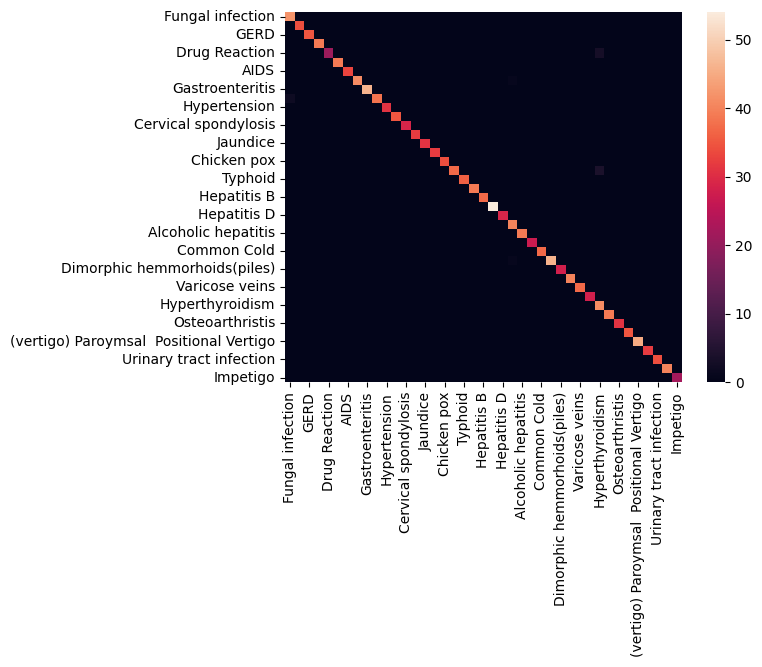

In [107]:
df_forest_tres = pd.DataFrame(conf_mat_forest_tres , index=severidad_reducido['Disease'].unique(), columns=severidad_reducido['Disease'].unique())

print('F1-score% =', f1_score(y_test_dos , pred_forest_tres , average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test_dos , pred_forest_tres)*100)
sns.heatmap(df_forest_tres)

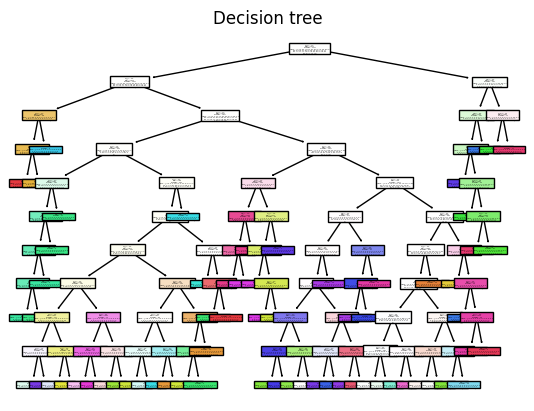

In [108]:
plt.figure()
plot_tree( rf_model_tres.estimators_[1] , filled=True)
plt.title("Decision tree")
plt.show()

com roc curve

In [109]:
label_binarizer = LabelBinarizer().fit(y_train_dos)
y_ft = label_binarizer.transform(y_test_dos)
y_ft.shape  # (n_samples, n_classes)

(1476, 41)

In [ ]:
#class_of_interest = "GERD"
#class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
#class_id

In [110]:
y_pf = label_binarizer.transform( pred_forest_tres)
y_pf.shape  # (n_samples, n_classes)

(1476, 41)

AUC

Text(0.5, 1.0, 'O')

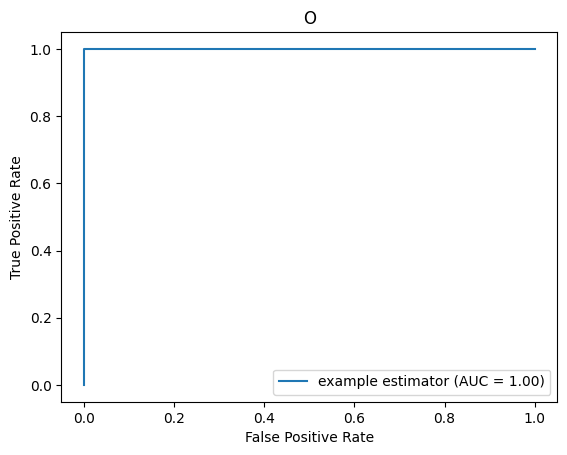

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_ft[:, class_id] ,  y_pf[:, class_id] )
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("O")

The Wine problem

In [112]:
wine = pd.read_csv("/content/HPC_II/Taller_aprendizaje_supervisado/winequality-red.csv")
wine.head()
print(wine.columns)
print(wine.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)


In [113]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [114]:
wine['pH'].isnull().values.any()

False

In [115]:
wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

distribucion de la variable objetivo

The Wine problem

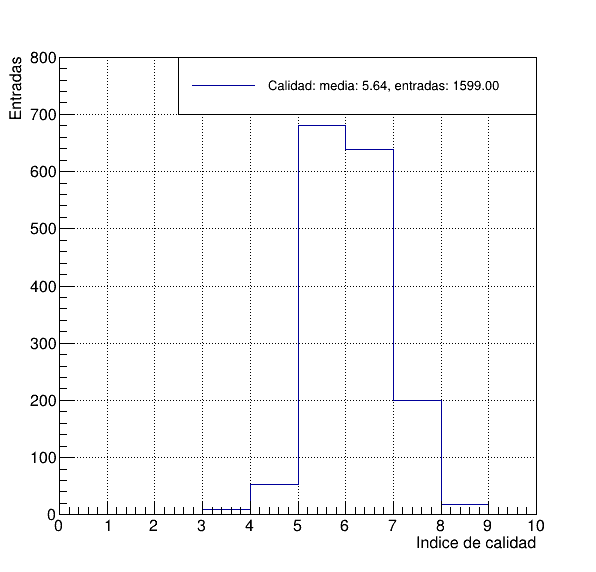

In [116]:
T_target = TH1F("Calidad","",10, 0, 10)
cal = wine['quality'].values

for a in cal:
   T_target.Fill(a)

#for d in sin_cuatro:
#   T4.Fill(d)

T_target.SetStats(0)
#T2.SetLineColor(kRed )
#T3.SetLineColor(kBlack )
#T4.SetLineColor(kCyan)
#T1.GetYaxis().SetLabelOffset(-0.1)

mean_uno = T_target.GetMean()
entries_uno = T_target.GetEntries()

#mean_dos = T2.GetMean()
#entries_dos = T2.GetEntries()

#mean_tres = T3.GetMean()
#entries_tres = T3.GetEntries()

#mean_cuatro = T4.GetMean()
#entries_cuatro = T4.GetEntries()

T_target.SetMaximum(800)
T_target.GetYaxis().SetLabelSize(0.03)
T_target.GetYaxis().SetTitleSize(0.03)
T_target.GetXaxis().SetLabelSize(0.03)
T_target.GetXaxis().SetTitleSize(0.03)
c = TCanvas("T","canvas", 600 , 600)
T_target.Draw("")
#T2.Draw("SAME")
#T3.Draw("SAME")
#T4.Draw("SAME")
legend = ROOT.TLegend(0.3, 0.8, 0.9, 0.9)
legend.SetTextSize(0.025)
legend.AddEntry(T_target, f"Calidad: media: {mean_uno:.2f}, entradas: {entries_uno:.2f}", "l")
#legend.AddEntry(T2, f"Sintoma 2 : media: {mean_dos:.2f}, entradas: {entries_dos:.2f}", "l")
#legend.AddEntry(T3, f"Sintoma 3 : media: {mean_tres:.2f}, entradas: {entries_tres:.2f}", "l")
#legend.AddEntry(T4, f"Sintoma 4 : media: {mean_cuatro:.2f}, entradas: {entries_cuatro:.2f}", "l")
legend.Draw()

T_target.SetTitle(";Indice de calidad; Entradas")
c.Draw()
c.SetGrid()
#c0.SaveAs('energy_dist.png')

In [117]:
wine_data = wine.drop(['quality'],axis=1)
# X_completo_train=train.drop(['TRUE'],axis=1)
#dat = dat.reset_index(drop=True, inplace=True)
#dat.tail()
wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

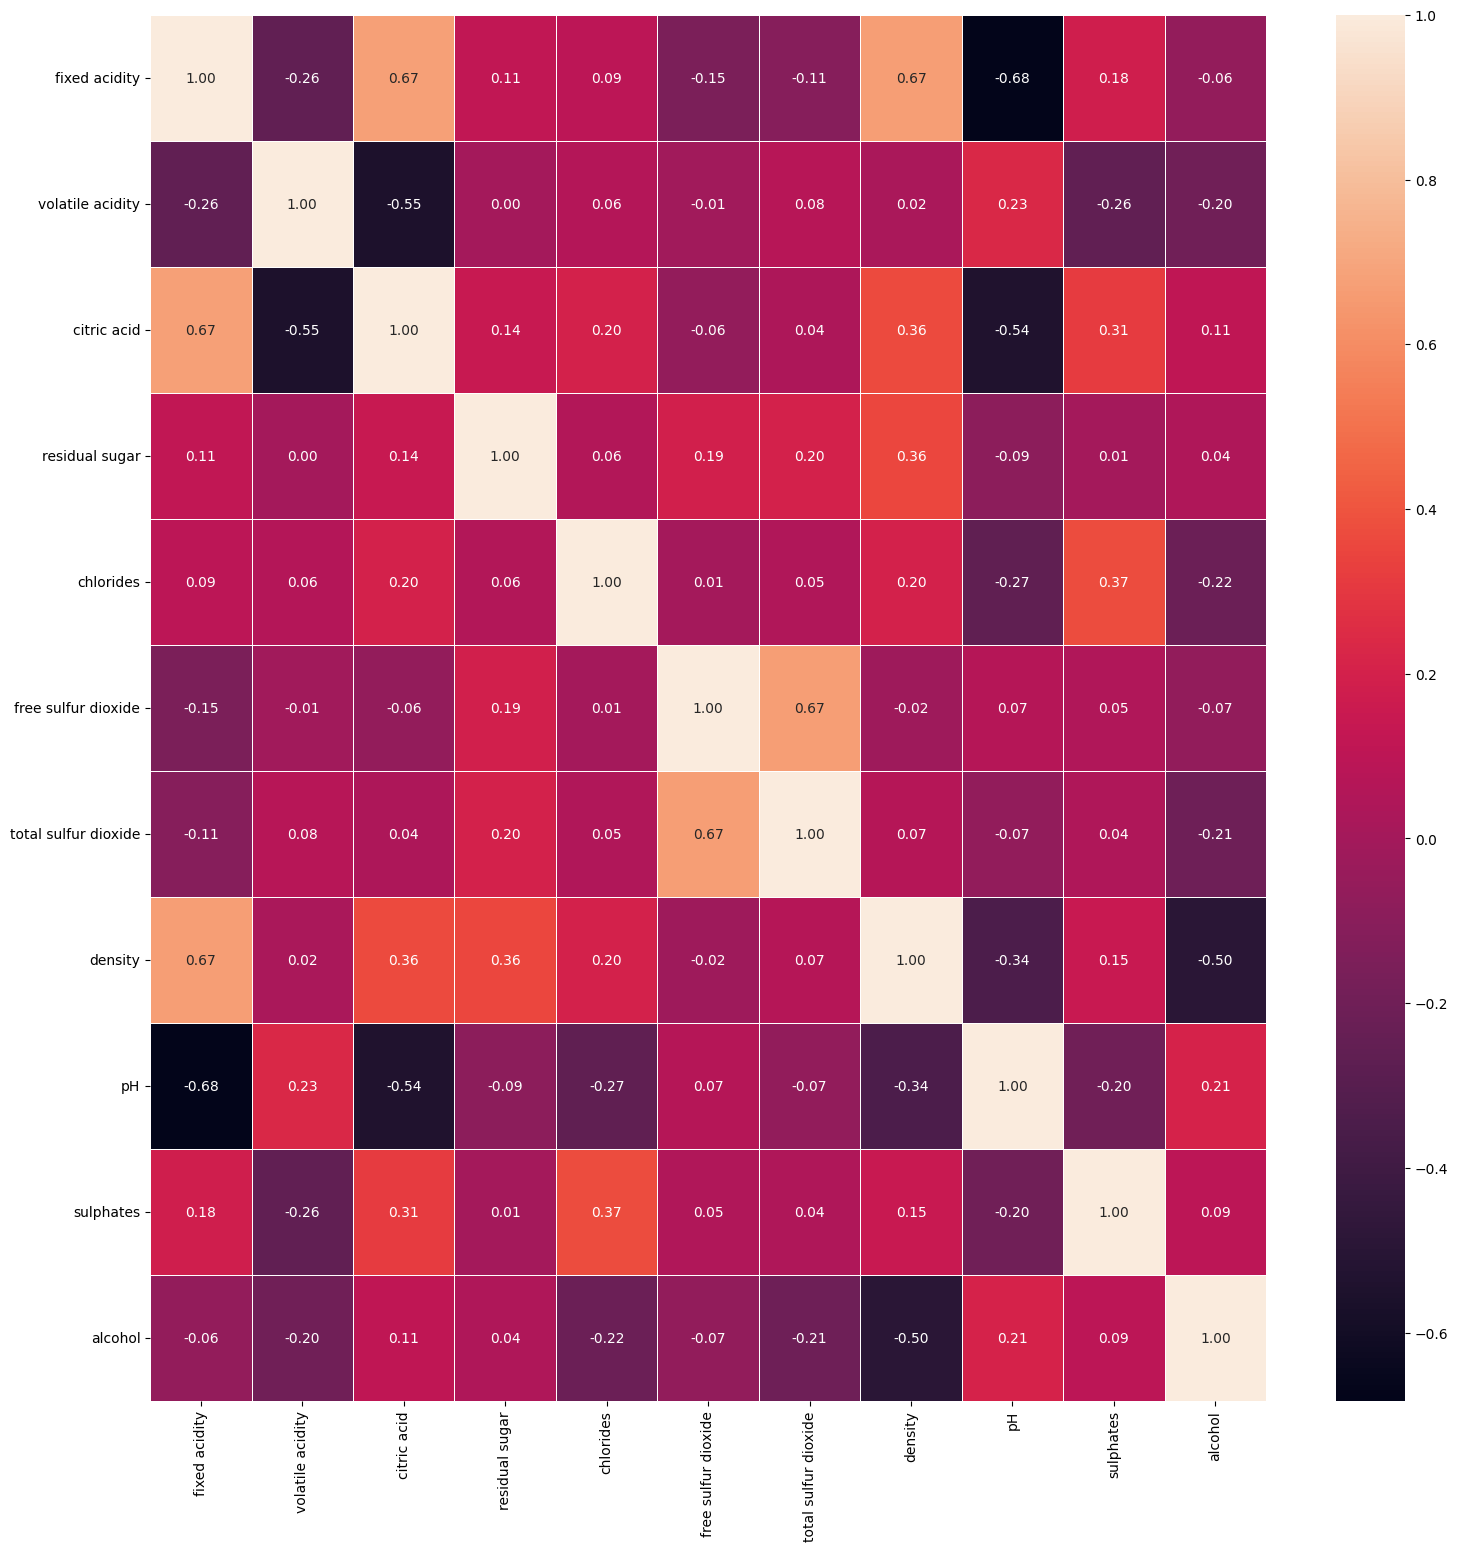

In [118]:
correlation_matrix_wine_p = wine_data.corr(method = 'pearson')

fig, ax = plt.subplots(figsize=(18 ,18 ))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(correlation_matrix_wine_p , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

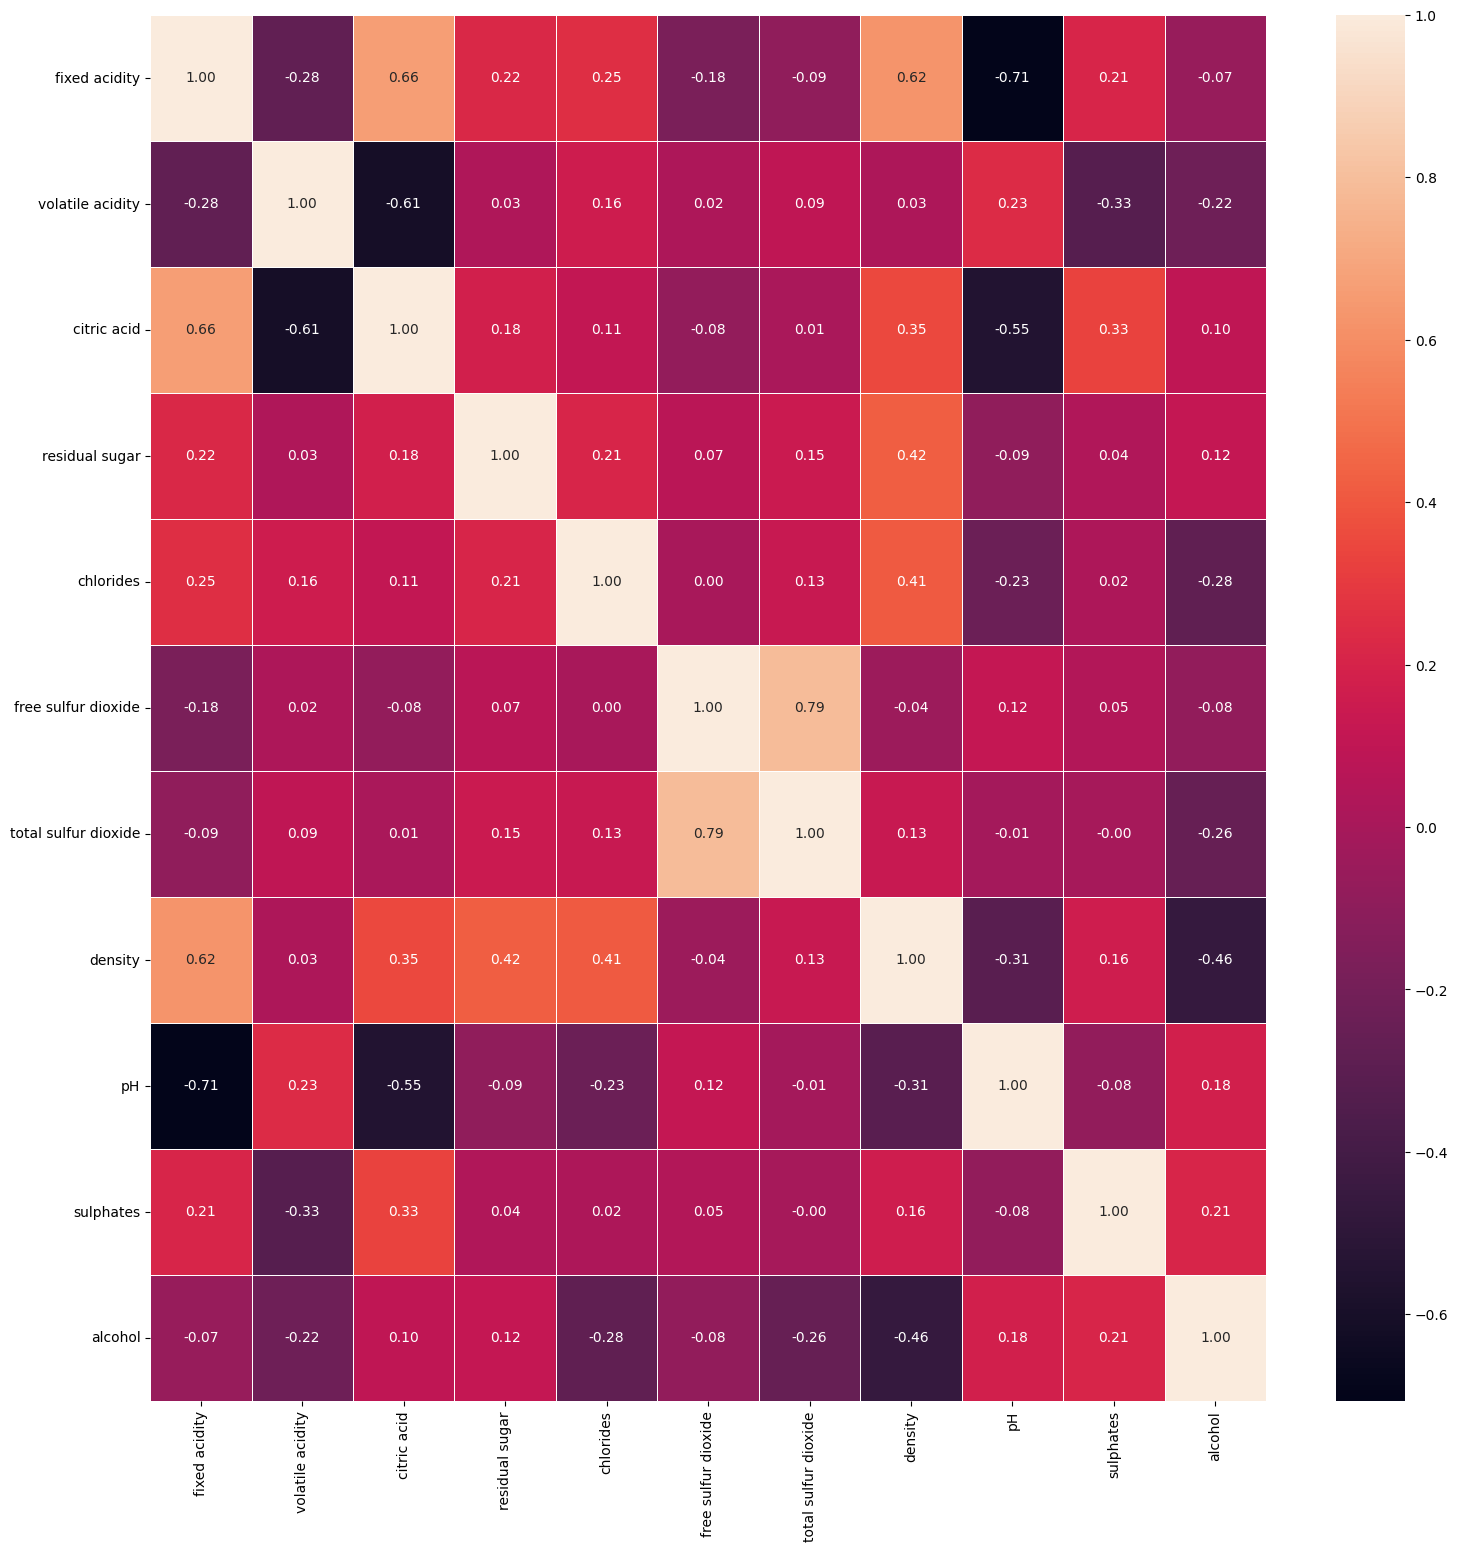

In [119]:
correlation_matrix_wine_s = wine_data.corr(method ='spearman')

fig, ax = plt.subplots(figsize=(18 ,18 ))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(correlation_matrix_wine_s , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

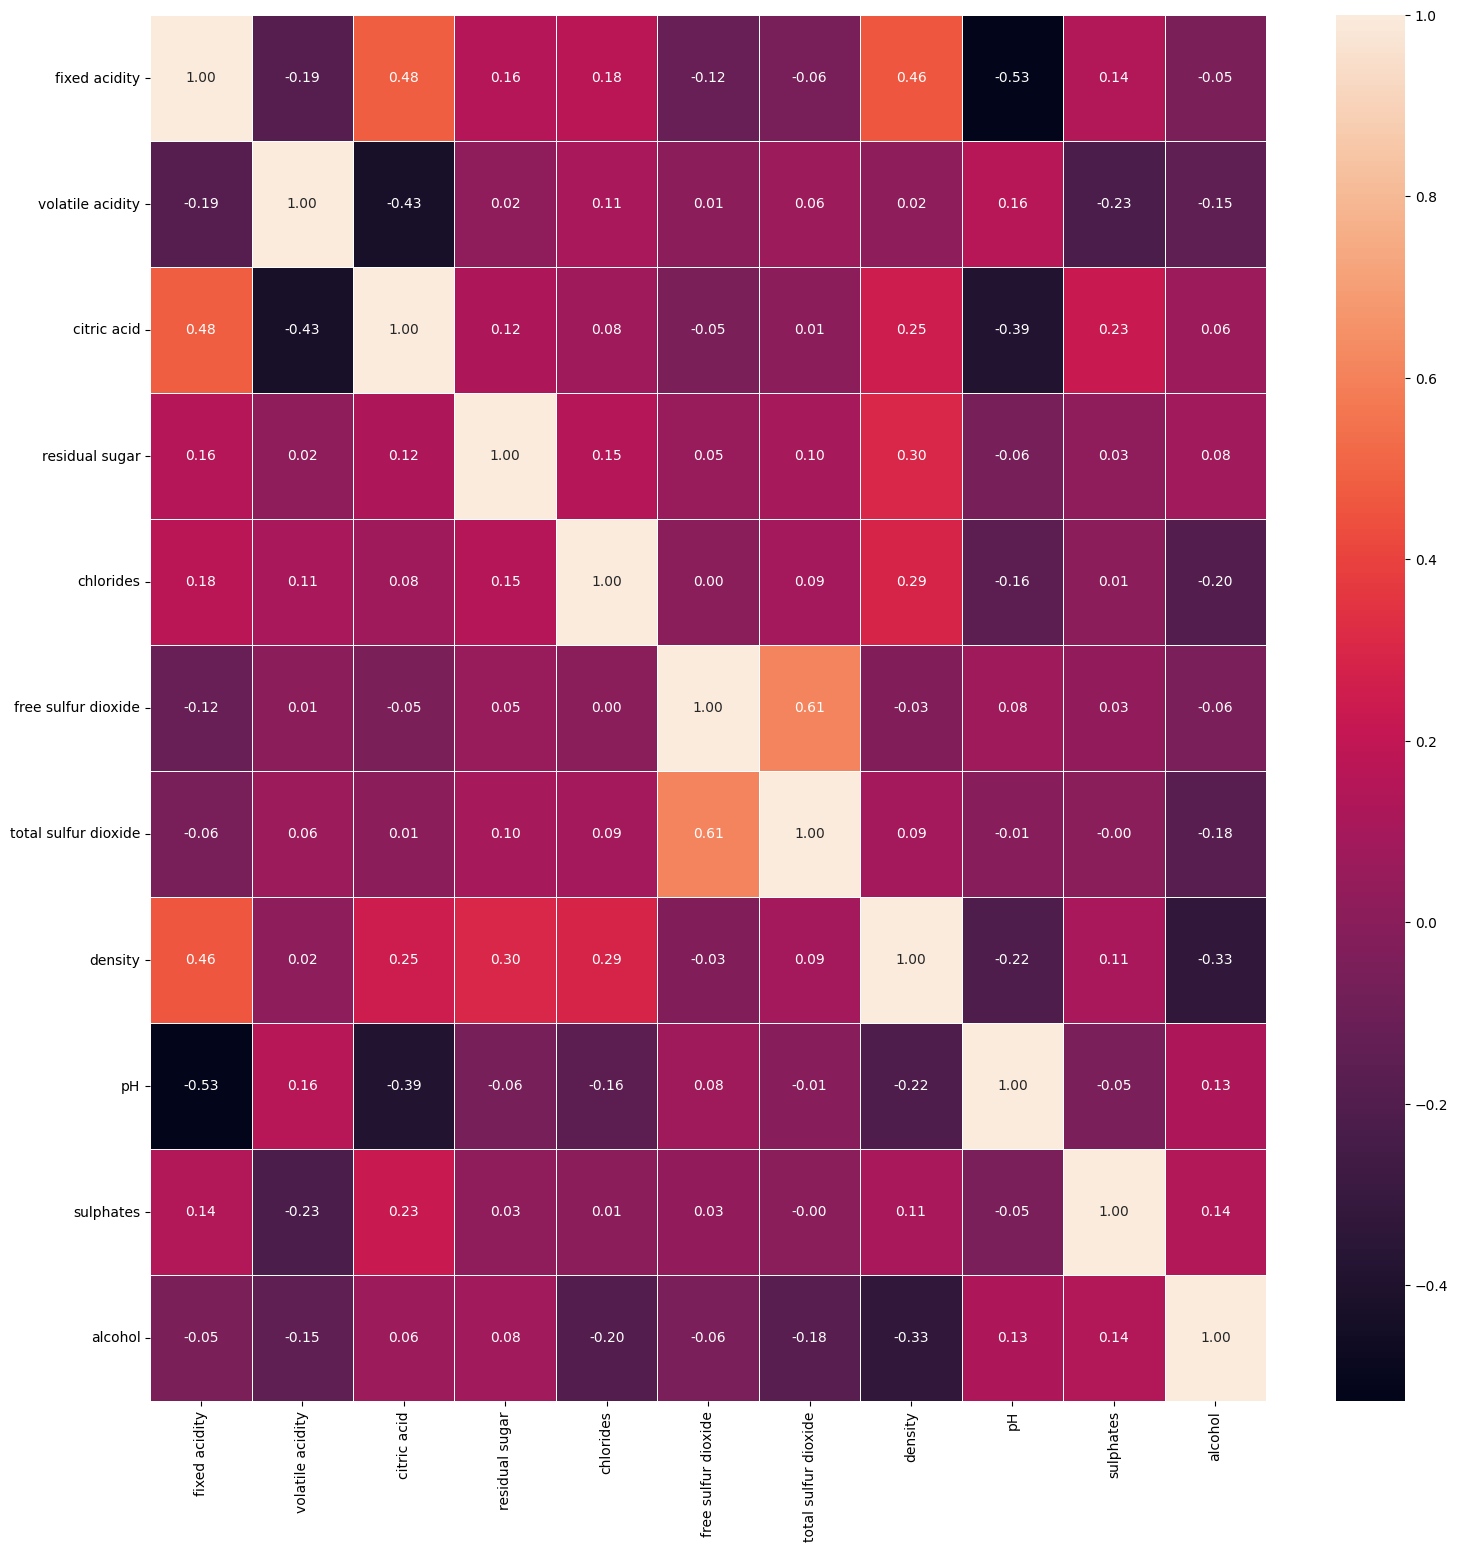

In [120]:
correlation_matrix_wine_k = wine_data.corr(method = 'kendall')

fig, ax = plt.subplots(figsize=(18 ,18 ))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(correlation_matrix_wine_k , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

<ipython-input-121-7bb785d3e15e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[columns[k]], ax = ax1[i][j], color = 'red')
<ipython-input-121-7bb785d3e15e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[columns[k]], ax = ax1[i][j], color = 'red')
<ipython-input-121-7bb785d3e15e>:7

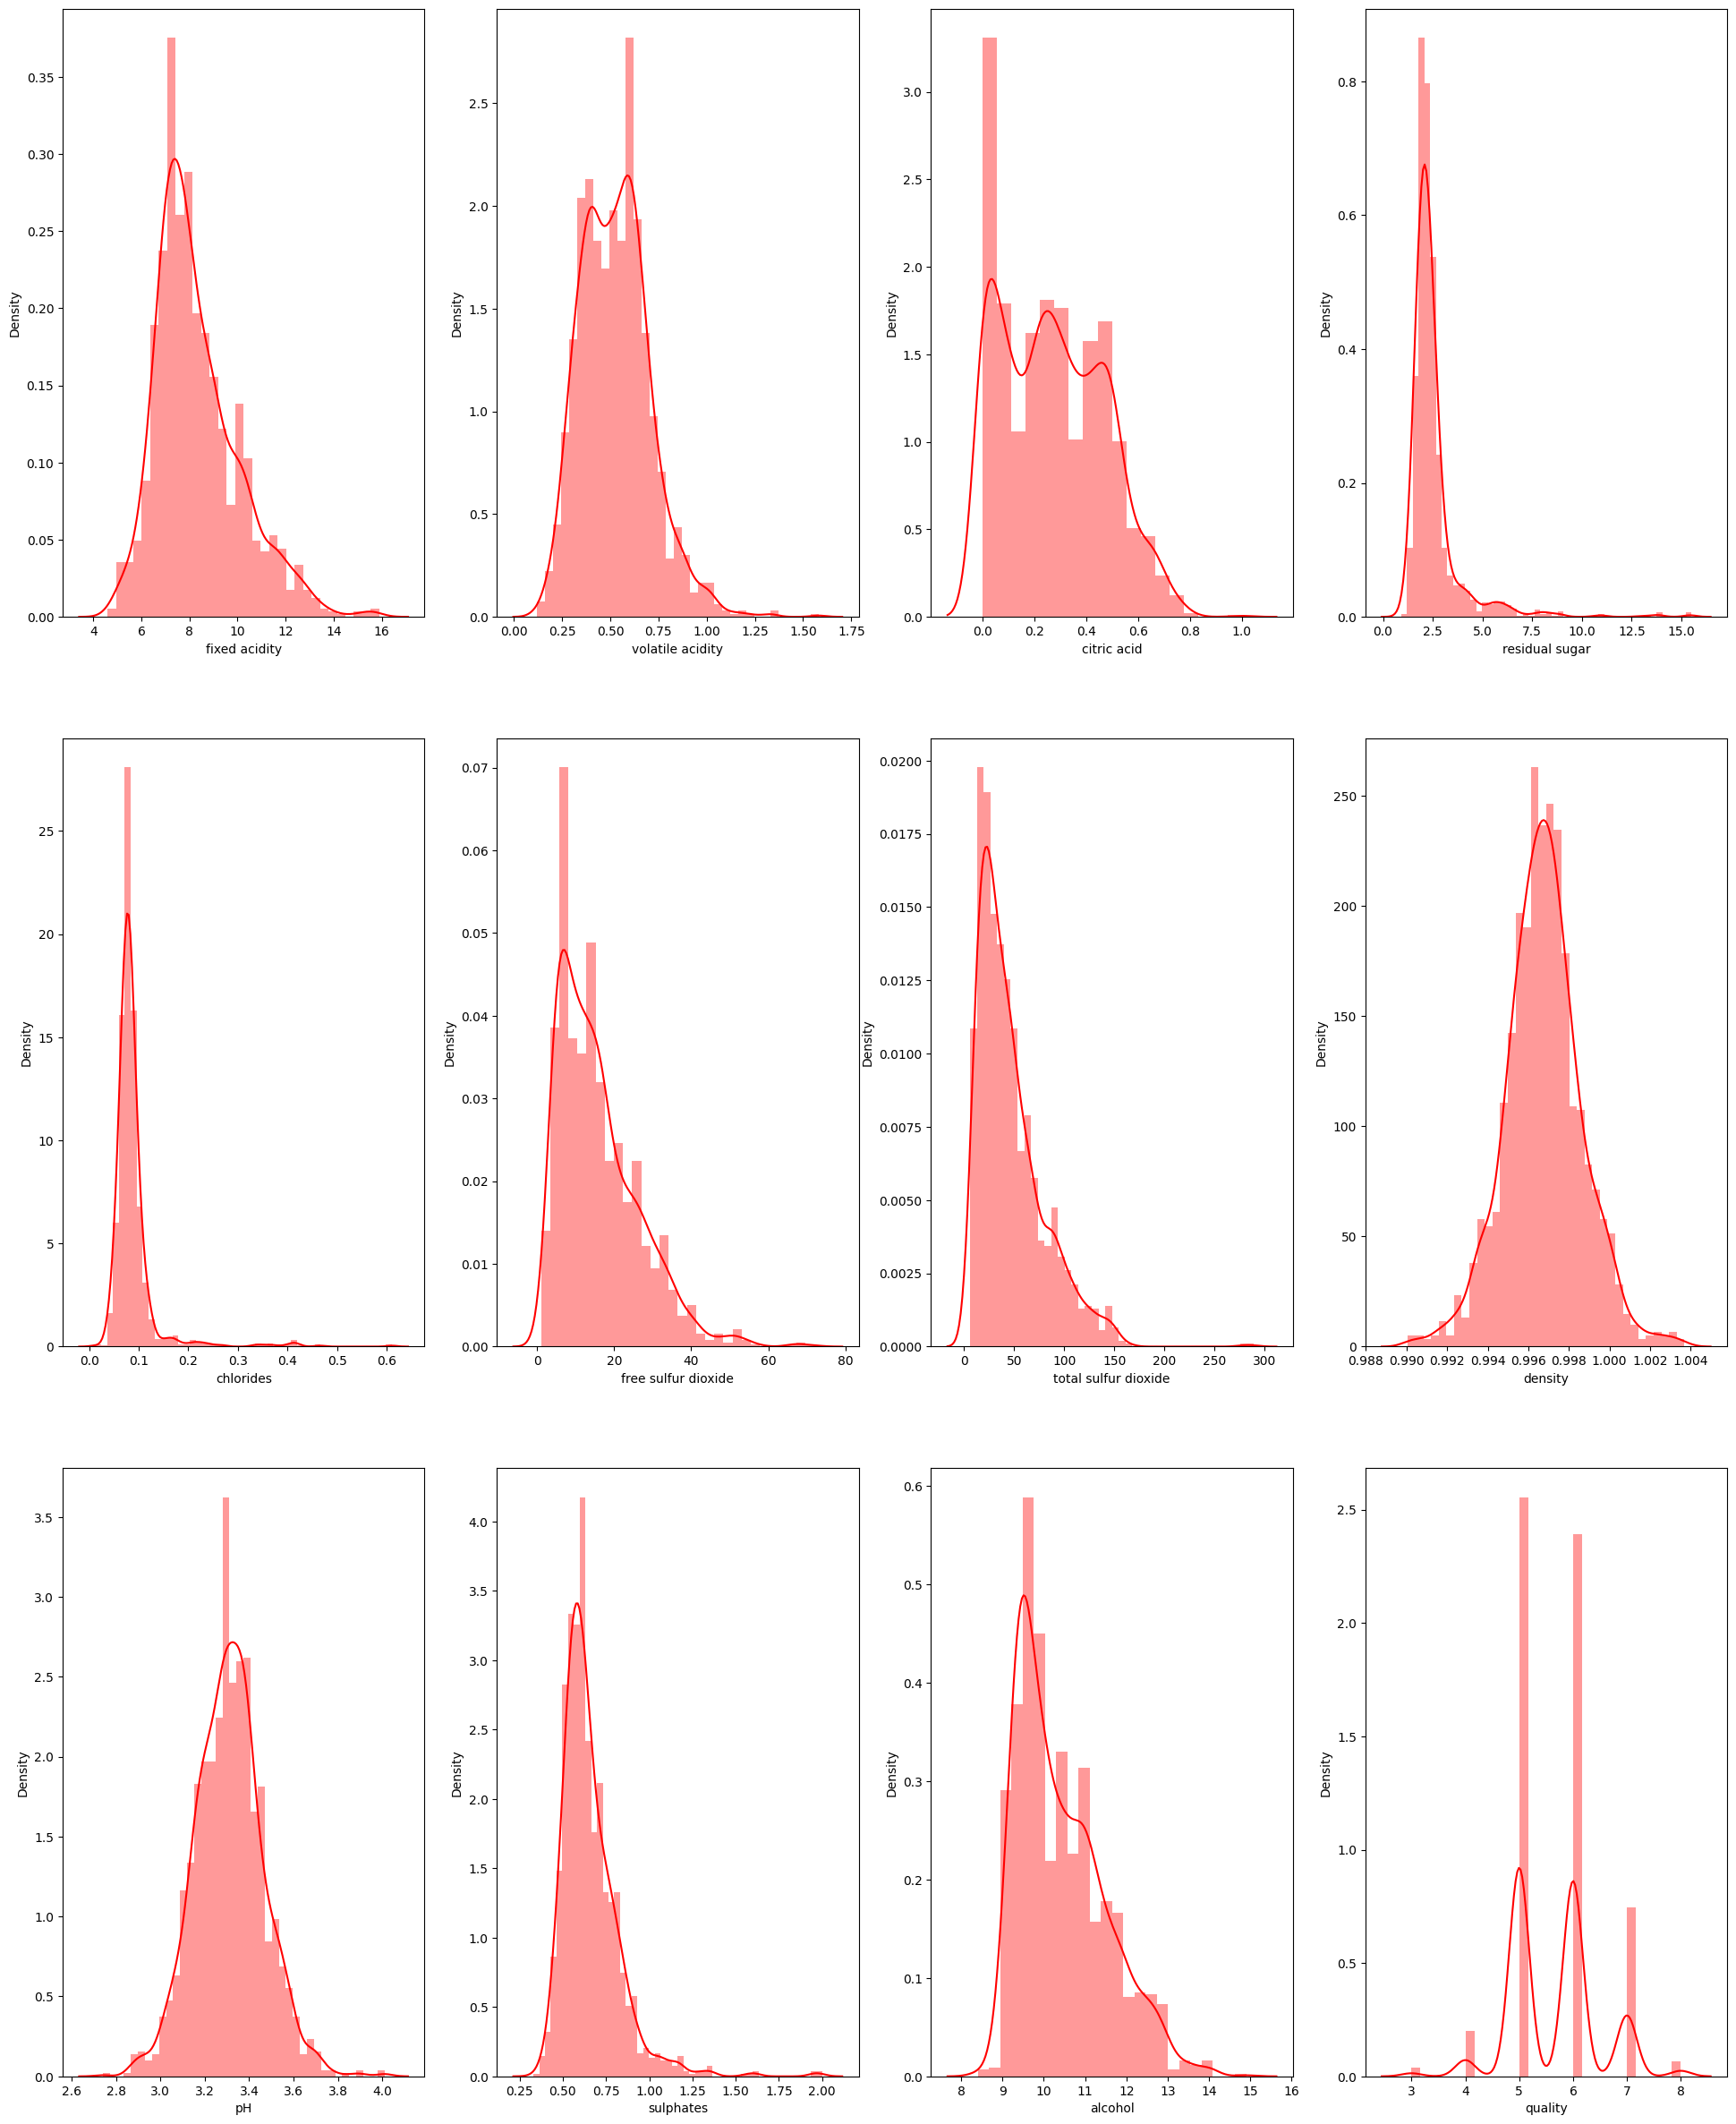

In [121]:
color = sns.color_palette("pastel")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(wine.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(wine[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

Training

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_data, cal  , test_size=0.3,random_state=13)

In [123]:
GB_wine = GradientBoostingClassifier (n_estimators=100, random_state=30  ,max_depth=10  )

In [124]:
start = time.time()
GB_wine.fit(X_train , Y_train )
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 10.612724781036377s


In [125]:
GB_wine.score(X_test, Y_test)

0.65

In [126]:
svc_wine = SVC()

In [127]:
start = time.time()
svc_wine.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.08282923698425293s


In [128]:
svc_wine.score(X_test, Y_test)

0.5166666666666667

In [129]:
rf_wine = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=0 ,  oob_score=True  )

In [130]:
start = time.time()
rf_wine.fit(X_train , Y_train )
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 4.96706223487854s


In [131]:
rf_wine.score(X_test, Y_test)

0.6708333333333333

Trampa:

In [132]:
#w_4 = wine[wine.quality==4]
w_5 = wine[wine.quality==5]
w_6 = wine[wine.quality==6]
w_7 = wine[wine.quality==7]
#w_8 = wine[wine.quality==8]

In [133]:
wine_mod = pd.concat([  w_5 , w_6, w_7 ]).reset_index(drop=True)
wine_mod.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3            7.4              0.70         0.00             1.9      0.076   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 11.0                  34.0   0.9978  3.51       0.56   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.4        5  
4      9.4        5

In [134]:
#Balanced_df[selected_features]
wine_X = wine_mod.drop(['quality'],axis=1)
wine_Y = wine_mod['quality'].values


In [135]:
X_train, X_test, Y_train, Y_test = train_test_split( wine_X , wine_Y , test_size=0.3,random_state=13)

In [136]:
start = time.time()
GB_wine.fit(X_train , Y_train )
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 6.696923017501831s


In [137]:
pred_gb_wine = GB_wine.predict(X_test)
pred_gb_wine

array([5, 6, 6, 5, 6, 6, 5, 7, 5, 5, 5, 5, 6, 7, 5, 5, 7, 6, 5, 5, 6, 6,
       6, 5, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7, 5, 5, 6, 5, 7, 7,
       6, 5, 5, 5, 6, 5, 6, 6, 6, 7, 5, 5, 7, 5, 7, 6, 6, 5, 6, 5, 7, 7,
       6, 5, 5, 5, 5, 7, 6, 5, 5, 7, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 6, 5,
       6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 6, 5, 6, 7, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5,
       6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 7, 5,
       7, 5, 5, 6, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 7, 5, 6, 5, 6, 5, 6, 6,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5,
       7, 7, 6, 5, 6, 5, 7, 5, 6, 5, 5, 6, 6, 5, 7, 7, 6, 6, 5, 6, 5, 6,
       5, 5, 5, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 5, 5,

In [ ]:
# salvar el modelo
#pickle.dump(GB_wine, open("gb_wine.pickle.dat", "wb"))

In [138]:
imp_wine = GB_wine.feature_importances_.argsort()
print("index order boosting:")
print(imp_wine)

index order boosting:
[ 5  2  7  3  0  4  8  6  1  9 10]


In [139]:
GB_wine.score(X_test, Y_test)

0.7236842105263158

In [140]:
conf_mat_gb_wine = confusion_matrix(Y_test, pred_gb_wine)
print(  conf_mat_gb_wine  )

[[157  38   2]
 [ 45 145  17]
 [  5  19  28]]


F1-score% = 68.39769143988565 | Accuracy% = 72.36842105263158


<Axes: >

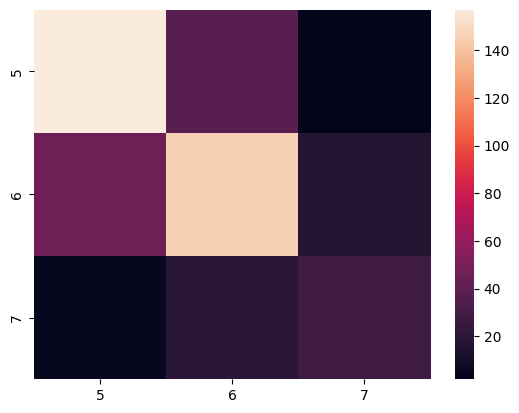

In [141]:
df_gb_wine = pd.DataFrame(conf_mat_gb_wine, index=wine_mod['quality'].unique(), columns= wine_mod['quality'].unique())

print('F1-score% =', f1_score(Y_test, pred_gb_wine , average='macro')*100, '|', 'Accuracy% =', accuracy_score(Y_test, pred_gb_wine)*100)
sns.heatmap(df_gb_wine)

In [142]:
label_binarizer_wine = LabelBinarizer().fit(Y_train)
y_t_w = label_binarizer_wine.transform(Y_test)
y_t_w.shape  # (n_samples, n_classes)

(456, 3)

In [143]:
print(y_t_w)

[[1 0 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [0 1 0]
 [0 1 0]]


In [173]:
clase = 5
clase_id = np.flatnonzero(label_binarizer_wine.classes_ == clase)[0]
clase_id

0

In [145]:
#label_binarizer = LabelBinarizer().fit(y_train)
y_gb_wine = label_binarizer_wine.transform( pred_gb_wine )
y_gb_wine.shape  # (n_samples, n_classes)

(456, 3)

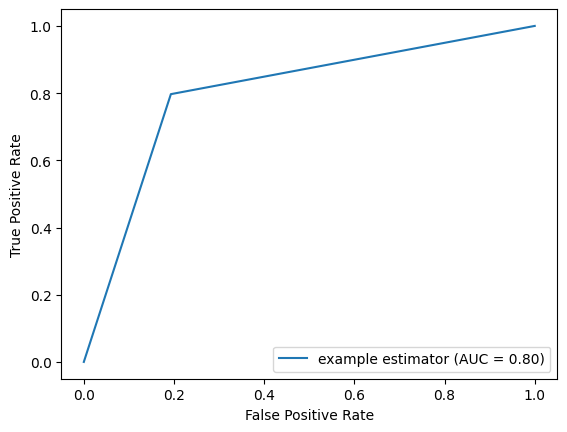

In [146]:
fpr, tpr, thresholds = metrics.roc_curve( y_t_w[:, clase_id] ,  y_gb_wine[:, clase_id] )
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

ss

In [147]:
X_2D_train = X_train[['alcohol','sulphates']]
X_2D_test  = X_test[['alcohol','sulphates']]

In [148]:
GB_wine_proy = GradientBoostingClassifier (n_estimators=100, random_state=30  ,max_depth=10  )
GB_wine_proy.fit( X_2D_train , Y_train )

GradientBoostingClassifier(max_depth=10, random_state=30)

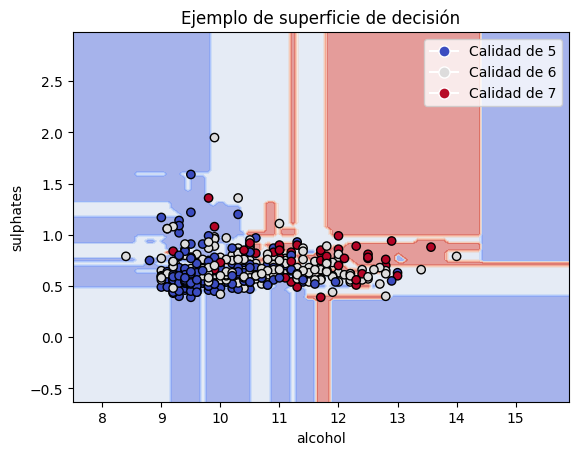

In [200]:
# Plot the decision boundary
#ax = plt.subplot(2, 3, pairidx + 1)
#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

#DecisionBoundaryDisplay.from_estimator(
#        rf_model_tres, x_train_dos, cmap=plt.cm.RdYlBu, response_method="predict",
#         xlabel=iris.feature_names[pair[0]],  )
# Choosing the first 2 columns for the plot
#X_train_cols = X_train[:, :2]

#rf_model_tres.fit(x_train_dos , y_train_dos )
#final_df = df[['col1','col2','col3']]
#  xlabel= datos.feature_names[0], ylabel=datos.feature_names[1],
# Plotting the tree boundaries

disp = DecisionBoundaryDisplay.from_estimator( GB_wine_proy,
                                              X_2D_train,  response_method="predict",
                                              xlabel='alcohol',ylabel='sulphates', alpha=0.5, cmap=plt.cm.coolwarm)

# Plotting the decision boundary and data points
#plt.figure(figsize=(10, 6))
#disp.plot(ax=plt.gca())  # ax parameter to plot onto the specified axis

# Plotting the data points
#plt.scatter(
#    X_train[:, 0], X_train[:, 1], c=y_train_dos, edgecolor="k",
#    cmap=plt.cm.coolwarm, label='Class 0 / Class 1' )
# Plotting the data points
disp.ax_.scatter(  X_2D_test['alcohol'] ,  X_2D_test['sulphates'] ,
                 c = Y_test ,  edgecolor="k",
                 cmap=plt.cm.coolwarm)

# Add a legend to the plot
#plt.legend()
cmap=plt.cm.coolwarm
color0 = cmap(0)
color1 = cmap(0.5)
color2 = cmap(0.99)
# Create custom legend
clase0 = plt.Line2D([0], [0], marker='o', color='w', label='Calidad de 5', markerfacecolor=color0, markersize=8)
clase1 = plt.Line2D([0], [0], marker='o', color='w', label='Calidad de 6', markerfacecolor=color1, markersize=8)
clase2 = plt.Line2D([0], [0], marker='o', color='w', label='Calidad de 7', markerfacecolor=color2, markersize=8)

plt.title(f"Ejemplo de superficie de decisión")

#plt.legend(['Class 0', 'Class 1', 'Decision Boundary'])
#handles, labels = disp.ax_.get_legend_handles_labels()
#disp.ax_.legend(handles, labels, framealpha=0.4, scatterpoints=1)
plt.legend(handles=[clase0, clase1, clase2])
plt.show()


Ahora, usemos el Bosque aleatorio

In [150]:
rf_wine = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=0 ,  oob_score=True  )
start = time.time()
rf_wine.fit(X_train , Y_train )
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 6.28958535194397s


In [151]:
rf_wine.score(X_test, Y_test)

0.7521929824561403

In [152]:
pred_forest_wine = rf_wine.predict(X_test)

In [153]:
#importnace fearues plot:
importances_rf= rf_wine.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_wine.estimators_], axis=0)

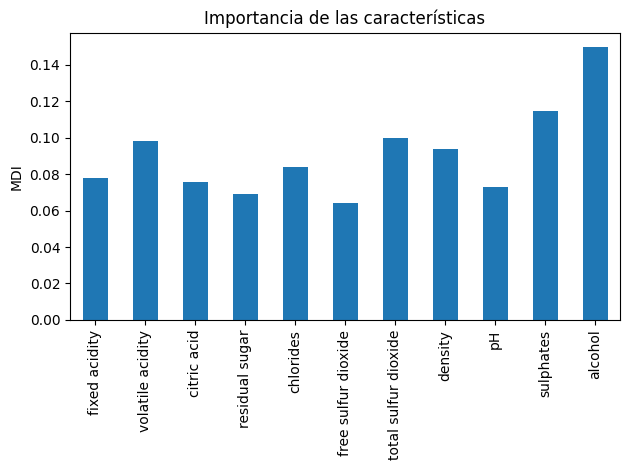

In [155]:
forest_importances_wine = pd.Series(importances_rf, index =  wine_X.columns )

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
forest_importances_wine.plot.bar(ax=ax)
ax.set_title("Importancia de las características")
ax.set_ylabel("MDI")
fig.tight_layout()

In [157]:
imp_forest_wine = rf_wine.feature_importances_.argsort()
print("indice de caracteristicas bosque aleatorio")
print(imp_forest_wine)

indice de caracteristicas bosque aleatorio
[ 5  3  8  2  0  4  7  1  6  9 10]


In [158]:
oob_w = rf_wine.oob_score_
print("oob wine:")
print(oob_w)

oob wine:
0.6949152542372882


In [ ]:
#pickle.dump(rf_model_tres, open("rf_tres.pickle.dat", "wb"))

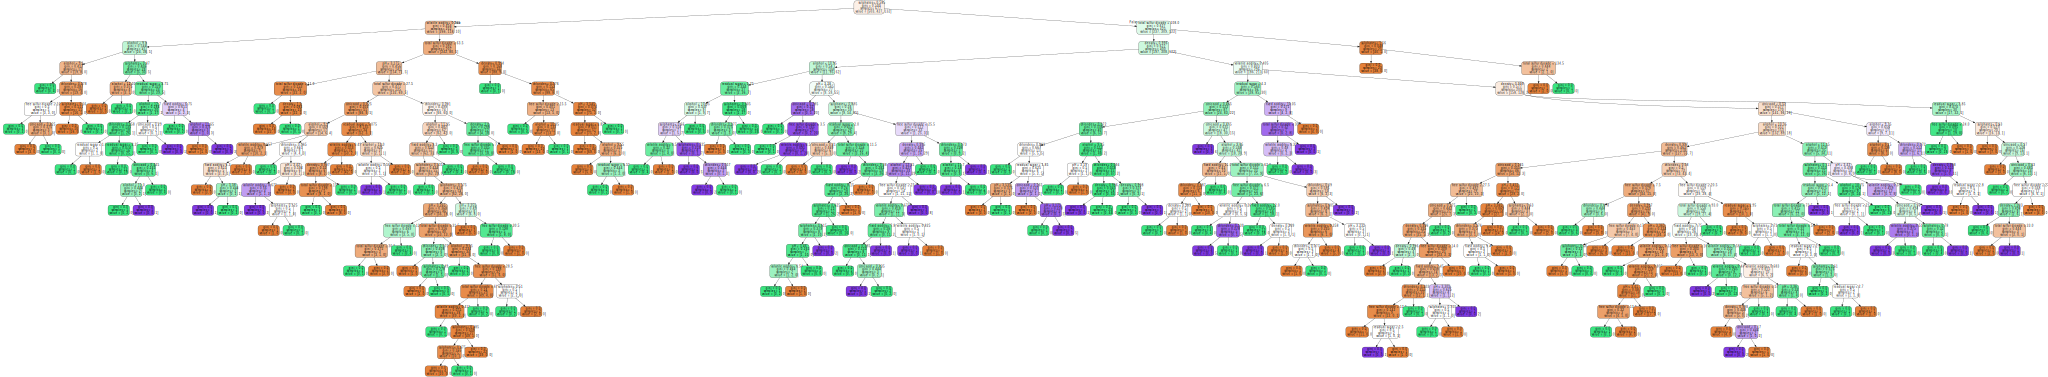

In [159]:
swin = tree.export_graphviz(rf_wine.estimators_[2] , out_file=None, feature_names=wine_X.columns, filled=True, rounded=True, special_characters=True)
graph_wine = graphviz.Source(swin)
graph_wine

In [160]:
conf_mat_forest_wine = confusion_matrix( Y_test , pred_forest_wine )
print(  conf_mat_forest_wine  )

[[163  34   0]
 [ 47 154   6]
 [  2  24  26]]


F1-score% = 71.70657219790387 | Accuracy% = 75.21929824561403


<Axes: >

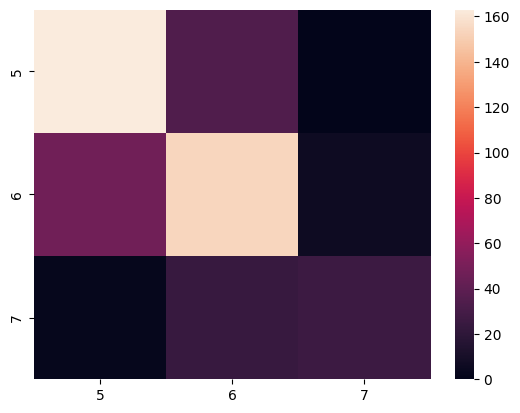

In [162]:
df_forest_wine = pd.DataFrame(conf_mat_forest_wine , index=wine_mod['quality'].unique(), columns= wine_mod['quality'].unique())

print('F1-score% =', f1_score( Y_test , pred_forest_wine, average='macro')*100, '|', 'Accuracy% =', accuracy_score(Y_test , pred_forest_wine)*100)
sns.heatmap(df_forest_wine)

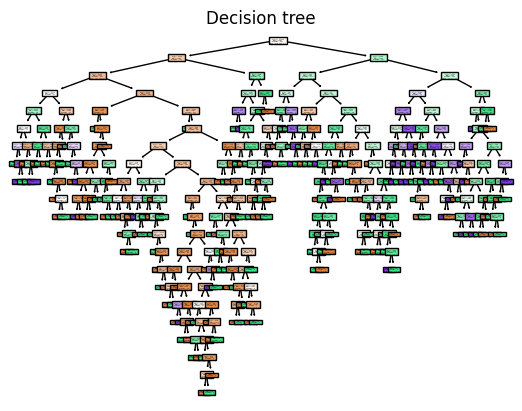

In [164]:
plt.figure()
plot_tree( rf_wine.estimators_[1] , filled=True)
plt.title("Decision tree")
plt.show()

com roc curve

In [169]:
y_rf = label_binarizer_wine.transform(  pred_forest_wine )
y_rf.shape  # (n_samples, n_classes)

(456, 3)

In [171]:
y_t_w.shape

(456, 3)

In [177]:
y_t_w[:, clase_id]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [175]:
clase_id

0

In [176]:
fpr, tpr, thresholds = metrics.roc_curve( y_t_w[:, clase_id] ,  y_rf[:, clase_id] )
fpr

array([0.        , 0.18918919, 1.        ])

AUC

Text(0.5, 1.0, 'O')

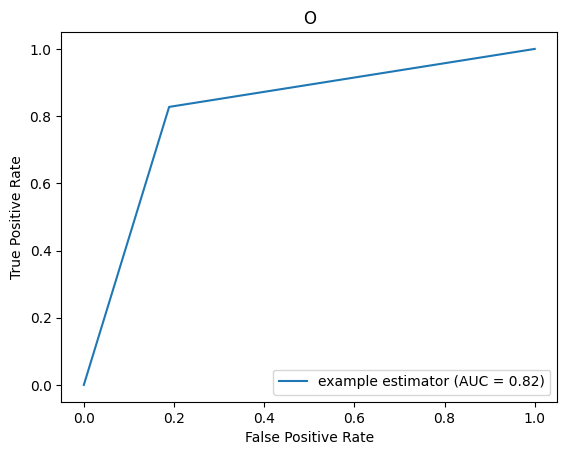

In [178]:
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("O")

Poryección

In [179]:
rf_wine_proy = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=0 ,  oob_score=True  )
rf_wine_proy.fit( X_2D_train , Y_train )

RandomForestClassifier(max_depth=100, n_estimators=1000, oob_score=True,
                       random_state=0)

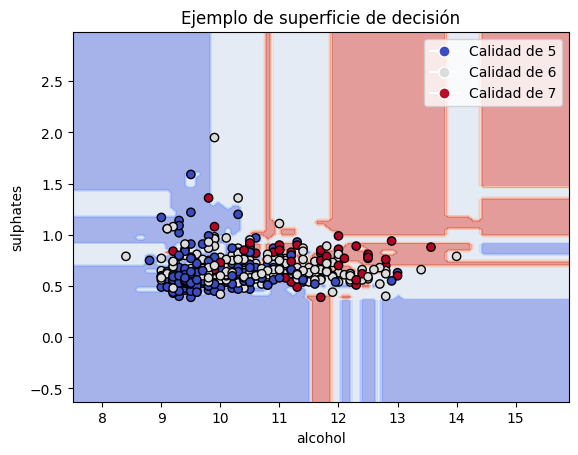

In [198]:
disp = DecisionBoundaryDisplay.from_estimator( rf_wine_proy,
                                              X_2D_train,  response_method="predict",
                                              xlabel='alcohol',ylabel='sulphates', alpha=0.5, cmap=plt.cm.coolwarm)

#scatter = ax.scatter(x, y, c=c, s=s)
scat = disp.ax_.scatter(  X_2D_test['alcohol'] ,  X_2D_test['sulphates'] ,
                 c = Y_test ,  edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.title(f"Ejemplo de superficie de decisión")

#scatter = ax.scatter(x, y, c=c, s=s)
# produce a legend with the unique colors from the scatter
#legend1 = ax.legend(*scat.legend_elements(),
#                    loc="lower left", title="Clases")

#ax.add_artist(legend1)
#handles, labels = scat.get_legend_handles_labels()
#disp.ax_.legend(handles, labels, framealpha=0.4, scatterpoints=1)

#handles, labels = disp.ax_.get_legend_handles_labels()
#disp.ax_.legend(handles, labels, framealpha=0.4, scatterpoints=1)

# produce a legend with the unique colors from the scatter
#legend1 = ax.legend(*scatter.legend_elements(),
  #                  loc="lower left", title="Classes")
#ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
cmap=plt.cm.coolwarm
color0 = cmap(0)
color1 = cmap(0.5)
color2 = cmap(0.99)
# Create custom legend
clase0 = plt.Line2D([0], [0], marker='o', color='w', label='Calidad de 5', markerfacecolor=color0, markersize=8)
clase1 = plt.Line2D([0], [0], marker='o', color='w', label='Calidad de 6', markerfacecolor=color1, markersize=8)
clase2 = plt.Line2D([0], [0], marker='o', color='w', label='Calidad de 7', markerfacecolor=color2, markersize=8)
#decision_boundary = plt.Line2D([0], [0], linestyle='--', color='k', label='Decision Boundary')

# Add the legend to the plot
plt.legend(handles=[clase0, clase1, clase2])
plt.show()

Ahora, ¿Por qué no intentar mejorar la predicción de calidad del conjunot de datos de los vinos, usando todos los índices?

Notas importantes:



-En ML, los datos suelen ser muchísimo más pesados, y cada una de las técnicas vistas adquiere dificultades adicionales.

- El balanceo de datos y transformaciones lineales son técnicas que ayudan a mejorar el desempeño en general de métodos de inferencia.

Refrecnes:

Thnaks to:


https://www.kaggle.com/code/naga26/disease-type-prediction-using-symptoms/notebook



https://www.kaggle.com/code/nikunjmalpani/wine-quality-prediction-imbalanced-data

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://stackabuse.com/bytes/plot-decision-boundaries-using-python-and-scikit-learn/

Lecturas propuestas:

 -Why


-Aplicación de algoritmos Random Forest y XGBoost en una base de solicitudes de
tarjetas de crédito

- Hot Spots & Hot Regions Detection
Using Classification Algorithms in BMPs
Complexes at the Protein-Protein
Interface with the Ground-State
Energy Feature

